<a href="https://colab.research.google.com/github/byarciptap/projects/blob/main/Fix_of_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation Using K-means Clustering**

---

About dataset :
The dataset for this project is provided by Dr. Omar Romero-Hernandez. [Visit this URL](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

---

Context
Problem Statement :
Perform customer personality analysis and create suitable clustering models for customer segmentation to help businesses in modifying their products based on target customers from different types of customer segmentation

---
**Atribut**
**People:**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Product:**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion:**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

---


# Data Preparation

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [4]:
# load data from google drive
path = '/content/drive/MyDrive/Project Data/Customer Segmentation/marketing_campaign.csv'
df_og=pd.read_csv(path,sep='\t')

# make a copy so the original data won't be change
df=df_og.copy(deep=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.isnull().sum() #Check how much null values exist

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Threating Missing Values

In [8]:
# Handling missing value
df = df.dropna()
print("Remaining rows after removing missing:",len(df))

Remaining rows after removing missing: 2216


In [9]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Checking for values and typos

In [10]:
columns_to_check = [ 'Education','Marital_Status']
for col in columns_to_check:
    print(df[col].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


Insight :
after checking it is estimated that there are no typos

## Check Duplicates

In [11]:
df[df.duplicated(subset=['ID','Dt_Customer'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


no duplicate rows detected

## Data Manipulation

In [12]:
# Convert data type of Dt_Customer and ID column

df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])
df['ID']=df['ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   object        
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

<ipython-input-12-1677554b6bbe>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])
<ipython-input-12-1677554b6bbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])
<ipython-input-12-1677554b6bbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID']=df['ID

In [13]:
# Clean up the education column for a better analysis

def education_level(education):
    if education in ["Basic","2n Cycle"]:
        return "Under Graduate"
    if education in ["Graduation"]:
      return "Graduate"
    else:
        return "Post Graduate"

df['Education'] = df['Education'].apply(education_level)
df['Education'].value_counts()

<ipython-input-13-f0c6504baa37>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].apply(education_level)


Graduate          1116
Post Graduate      846
Under Graduate     254
Name: Education, dtype: int64

In [14]:
# Clean up the marital_status column for a better analysis

def marital_status(status):
    if status in ["Married","Together"]:
        return "Partner"
    else:
        return "Alone"

df['Living_Status'] = df['Marital_Status'].apply(marital_status)
df['Living_Status'].value_counts()

<ipython-input-14-b49b743f83fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Living_Status'] = df['Marital_Status'].apply(marital_status)


Partner    1430
Alone       786
Name: Living_Status, dtype: int64

In [15]:
# Create a new column Age to determine the age of the customer

df['Age']= 2023 - df['Year_Birth']
min_age = df['Age'].min()
max_age = df['Age'].max()

print(f'customer smallest age:{min_age}\n')
print(f'customer highest age:{max_age}')

customer smallest age:27

customer highest age:130


<ipython-input-15-2073b8007aca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']= 2023 - df['Year_Birth']


In [16]:
#for clarity rename columns

df = df.rename(columns={'MntWines':'wine',
                        'MntFruits':'fruit',
                        'MntMeatProducts':'meat',
                        'MntFishProducts':'fish',
                        'MntSweetProducts':'sweet',
                        'MntGoldProds':'gold'})

df.columns=df.columns.str.lower()
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'wine', 'fruit', 'meat', 'fish',
       'sweet', 'gold', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'living_status', 'age'],
      dtype='object')

In [17]:
# Create a new column spents for total spendings on different items

df['spent']=df['wine'] + df['fruit'] + df['meat'] + df['fish'] + df['sweet'] + df['gold']
df['spent'].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: spent, dtype: float64

In [18]:
# Create a new column children for total children in the household
df['children']=df['kidhome'] + df['teenhome']
df['children'].describe()

count    2216.000000
mean        0.947202
std         0.749062
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: children, dtype: float64

In [19]:
# Create a new column family_size

df['family_size'] = df['living_status'].replace({'Partner':2,'Alone':1}) + df['children']
df['family_size'].describe()

count    2216.000000
mean        2.592509
std         0.905722
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: family_size, dtype: float64

In [20]:
# Remove unneccessary features

columns_to_drop = ['year_birth','marital_status','z_costcontact','z_revenue',]
df.drop(columns_to_drop,inplace=True,axis=1)
print(df.columns)

Index(['id', 'education', 'income', 'kidhome', 'teenhome', 'dt_customer',
       'recency', 'wine', 'fruit', 'meat', 'fish', 'sweet', 'gold',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'response', 'living_status', 'age', 'spent', 'children',
       'family_size'],
      dtype='object')


In [21]:
# Menghitung panjang karakter pada masing-masing nilai dalam kolom 'id'
id_length_counts = df['id'].apply(len).value_counts().sort_index()

# Menampilkan jumlah panjang karakter dan frekuensinya
print(id_length_counts)

1       3
2      17
3     175
4    1756
5     265
Name: id, dtype: int64


In [22]:
# Menghitung panjang karakter pada masing-masing nilai dalam kolom 'id'
id_lengths = df['id'].apply(len)

# Fungsi untuk memanipulasi nilai pada kolom 'id' sesuai dengan panjang karakter
def manipulate_id(id_value, length):
    if length == 1:
        return '0000' + id_value
    elif length == 2:
        return '000' + id_value
    elif length == 3:
        return '00' + id_value
    elif length == 4:
        return '0' + id_value
    else:
        return id_value

# Memanipulasi data pada kolom 'id' sesuai dengan panjang karakter
df['id'] = df.apply(lambda row: manipulate_id(row['id'], id_lengths.loc[row.name]), axis=1)


In [23]:
# Menampilkan DataFrame setelah manipulasi
df['id'].apply(len).value_counts().sort_index()

5    2216
Name: id, dtype: int64

## Checking for Outliers

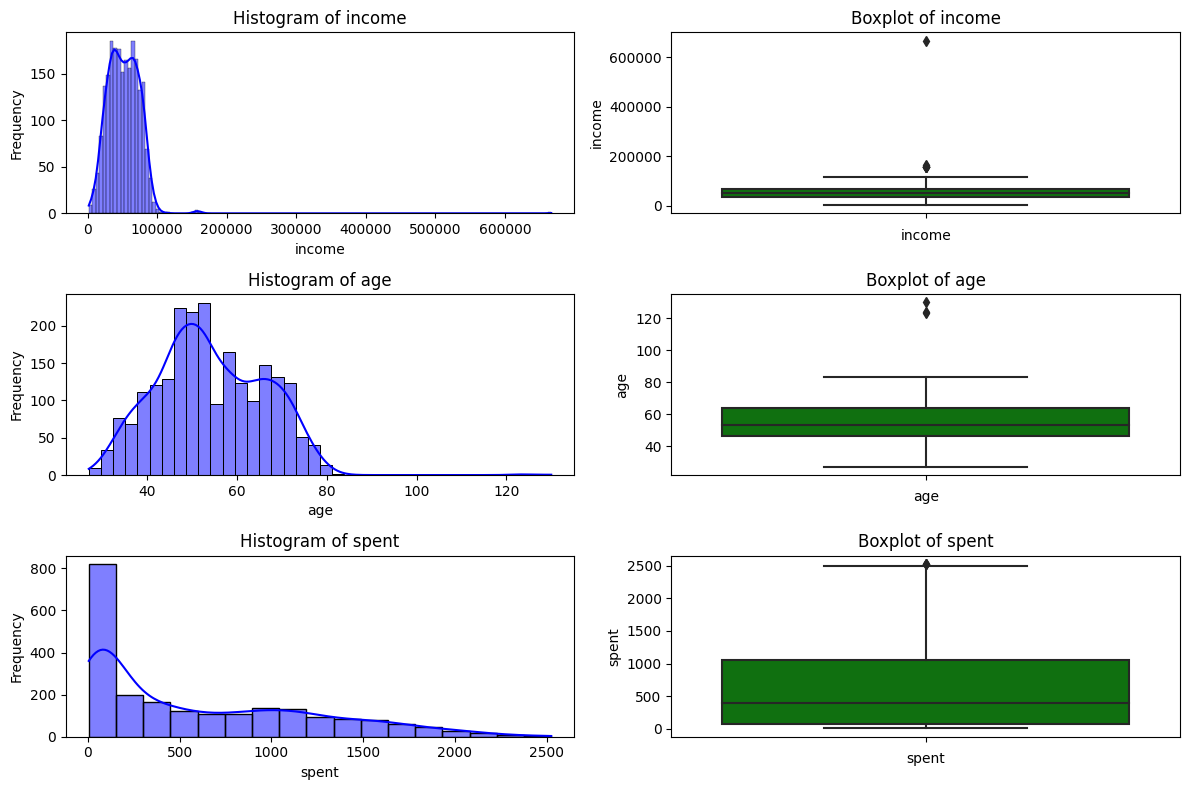

In [24]:
plot_columns = ['income', 'age','spent']
plot_types = ['Histogram', 'Boxplot']

fig, axs = plt.subplots(nrows=len(plot_columns), ncols=len(plot_types), figsize=(12, 8))

for col_idx, column in enumerate(plot_columns):
    for type_idx, plot_type in enumerate(plot_types):
        ax = axs[col_idx, type_idx]

        if plot_type == 'Histogram':
            sns.histplot(data=df, x=column, ax=ax, kde=True, color='blue')
            ax.set_title(f'Histogram of {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
        elif plot_type == 'Boxplot':
            sns.boxplot(data=df, y=column, ax=ax, color='green')
            ax.set_title(f'Boxplot of {column}')
            ax.set_xlabel(column)
            ax.set_ylabel(column)

plt.tight_layout()
plt.show()

In [25]:
df_clean = df.copy()

In [26]:
# removing/excluding the outlier and assign it to variable 'df_clean'
cols = ["income", "age"]

for i in cols:
    Q1 = df_clean[i].quantile(0.25)
    Q3 = df_clean[i].quantile(0.75)
    IQR = Q3 - Q1

    # Definisikan batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hapus outlier
    df_clean = df_clean[~((df_clean[i] < lower_bound) | (df_clean[i] > upper_bound))]

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2205 non-null   object        
 1   education            2205 non-null   object        
 2   income               2205 non-null   float64       
 3   kidhome              2205 non-null   int64         
 4   teenhome             2205 non-null   int64         
 5   dt_customer          2205 non-null   datetime64[ns]
 6   recency              2205 non-null   int64         
 7   wine                 2205 non-null   int64         
 8   fruit                2205 non-null   int64         
 9   meat                 2205 non-null   int64         
 10  fish                 2205 non-null   int64         
 11  sweet                2205 non-null   int64         
 12  gold                 2205 non-null   int64         
 13  numdealspurchases    2205 non-nul

In [28]:
df_clean.shape

(2205, 30)

# EDA

## Descriptive information about numeric variable

In [29]:
# Membuat dictionary untuk menyimpan tipe data tiap kolom
column_data_types = df.dtypes
# Memfilter hanya kolom-kolom dengan tipe data numerik
numeric_columns = column_data_types[column_data_types.apply(lambda x: pd.api.types.is_numeric_dtype(x))].index.tolist()
print(f'numeric column :{numeric_columns}')

numeric column :['income', 'kidhome', 'teenhome', 'recency', 'wine', 'fruit', 'meat', 'fish', 'sweet', 'gold', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'response', 'age', 'spent', 'children', 'family_size']


In [30]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

desc_clean = df_clean[numeric_columns].describe()
desc_clean.loc['kurtosis'] = df_clean[numeric_columns].kurt() #show kurtosis statistic
desc_clean.loc['skewness'] = df_clean[numeric_columns].skew() #show Skewness statistic
desc_clean.loc['variance'] = df_clean[numeric_columns].var() #show variance statistic
desc_clean.T.round(2)

,count,mean,std,min,25%,50%,75%,max,kurtosis,skewness,variance
income,2205.000,51622.090,20713.060,1730.000,35196.000,51287.000,68281.000,113734.000,-0.850,0.010,429031013.050
kidhome,2205.000,0.440,0.540,0.000,0.000,0.000,1.000,2.000,-0.790,0.640,0.290
teenhome,2205.000,0.510,0.540,0.000,0.000,0.000,1.000,2.000,-0.990,0.400,0.300
recency,2205.000,49.010,28.930,0.000,24.000,49.000,74.000,99.000,-1.200,-0.000,837.070
wine,2205.000,306.160,337.490,0.000,24.000,178.000,507.000,1493.000,0.570,1.170,113902.090
fruit,2205.000,26.400,39.780,0.000,2.000,8.000,33.000,199.000,4.050,2.100,1582.810
meat,2205.000,165.310,217.780,0.000,16.000,68.000,232.000,1725.000,3.250,1.820,47430.090
fish,2205.000,37.760,54.820,0.000,3.000,12.000,50.000,259.000,3.060,1.910,3005.740
sweet,2205.000,27.130,41.130,0.000,1.000,8.000,34.000,262.000,4.080,2.100,1691.720
gold,2205.000,44.060,51.740,0.000,9.000,25.000,56.000,321.000,3.140,1.830,2676.640


Insight :    

1.   The mean of user's income per year is **51,622 USD**.
2.   The mean of user's recency is 49 day.
3.   The mean of user's age is 54 y.o.
4.   The mean of user's spent in the last 2 year is 606 product (include on wine, fruit, meat, fish, sweet, gold).
5.   The mean of user's family size is 2.5 which means 2-3 people
6.   the average time a user has become a customer is 512 days

## Descriptive information about string variable

In [31]:
# Membuat dictionary untuk menyimpan tipe data tiap kolom
column_data_types = df.dtypes

# Memfilter hanya kolom-kolom dengan tipe data object (kategorikal)
object_columns = column_data_types[column_data_types == 'object'].index.tolist()

print(f'Kolom dengan tipe data object: {object_columns}')

Kolom dengan tipe data object: ['id', 'education', 'living_status']


In [32]:
df_clean[object_columns].describe()

,id,education,living_status
count,2205,2205,2205
unique,2205,3,2
top,05524,Graduate,Partner
freq,1,1113,1422


Insight :    

1.   Most customers have a graduate degree level of education
2.   Most customers live with a partner



## Descriptive information about datetype variable

In [33]:
time = ['dt_customer']
df_clean[time].describe()

<ipython-input-33-56d62ddd6fd1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clean[time].describe()


,dt_customer
count,2205
unique,662
top,2012-08-31 00:00:00
freq,12
first,2012-01-08 00:00:00
last,2014-12-06 00:00:00


Insight :    


1.   This dataset stores the customer join date from 2012-01-08 to 2014-12-06
2.   August 31 st, 2012, there were 12 customers joining, this is the most total customers joining in one day



## Total users in data

In [34]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_clean['id'].astype('category').describe()

count      2205
unique     2205
top       00000
freq          1
Name: id, dtype: object

There are 2205 total customers in the dataset

## Demographic of the Data

### User Age

In [35]:
df_clean['age'].describe()

count   2205
mean      54
std       12
min       27
25%       46
50%       53
75%       64
max       83
Name: age, dtype: float64

In [36]:
cust_age = df_clean.groupby('age')['id'].nunique() #Count the id as users and group it by the age
cust_age = cust_age.reset_index()   #Reset the index to make it into a pandas dataframe
cust_age

,age,id
0,27,2
1,28,5
2,29,3
3,30,5
4,31,13
5,32,15
6,33,18
7,34,29
8,35,29
9,36,27


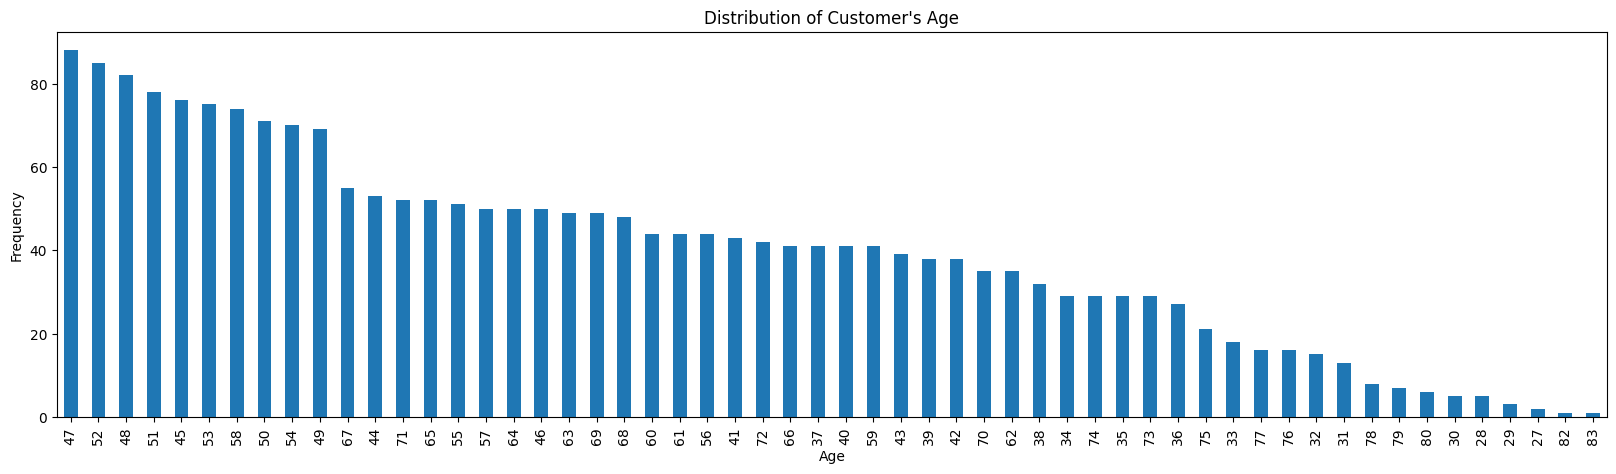

In [37]:
# Menghitung frekuensi masing-masing nilai usia dan mengurutkannya dari yang terbesar
age_counts = df_clean['age'].value_counts().sort_values(ascending=False)

# Membuat gambar diagram batang
plt.figure(figsize=(20, 5))
age_counts.plot(kind='bar')
plt.title("Distribution of Customer's Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

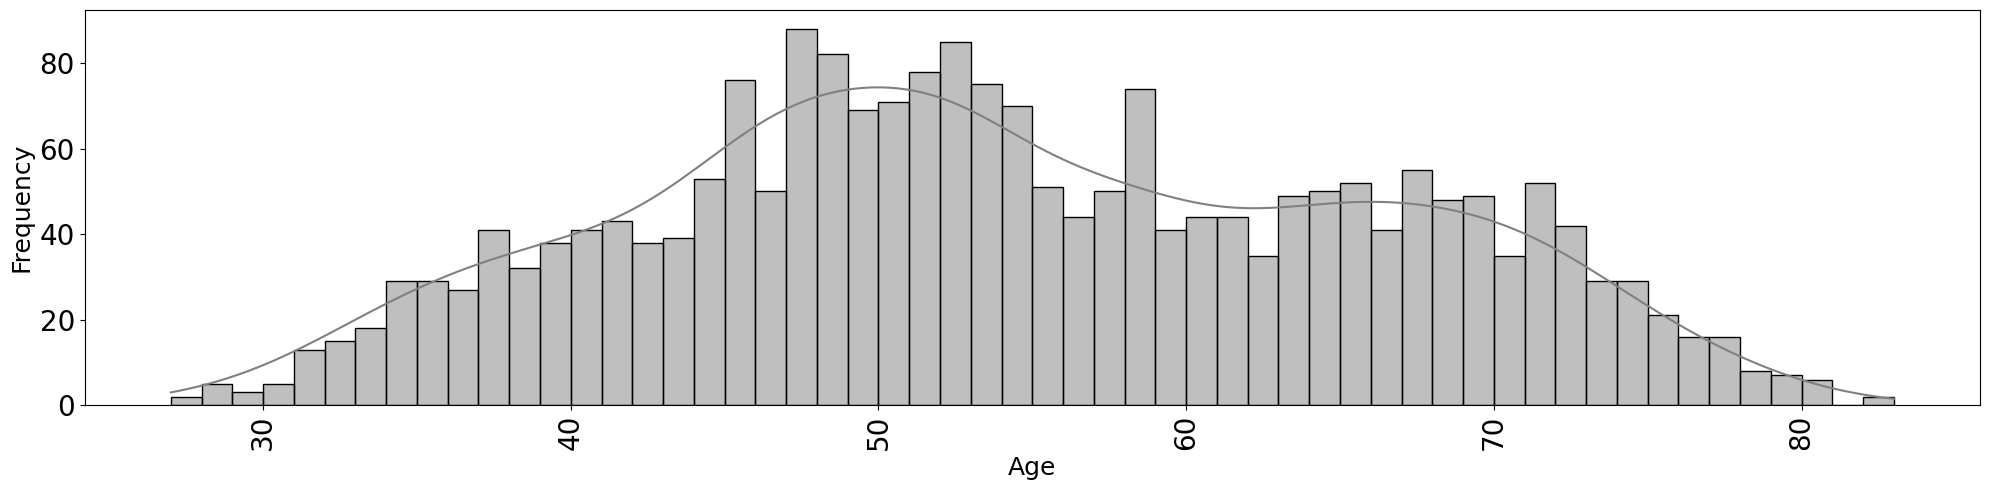

In [38]:
plt.figure(figsize=(20, 5))
sns.histplot(df_clean['age'], bins=len(df_clean['age'].unique()), kde=True, color='gray')  # Menggunakan histplot dari Seaborn
#plt.title("Distribution of Customer's Age")
plt.xlabel('Age',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(rotation=90, fontsize=20)  # Rotasi label sumbu x
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout()
plt.grid(False)
plt.show()

Insight  : there are quite a large number of customers between the ages of 45 to 58 years old

### User Education

In [39]:
df_clean['education'].describe()

count         2205
unique           3
top       Graduate
freq          1113
Name: education, dtype: object

In [40]:
cust_edu = df_clean.groupby('education')['id'].nunique() #Count the id as users and group it by the age
cust_edu = cust_edu.reset_index()   #Reset the index to make it into a pandas dataframe
cust_edu

,education,id
0,Graduate,1113
1,Post Graduate,840
2,Under Graduate,252


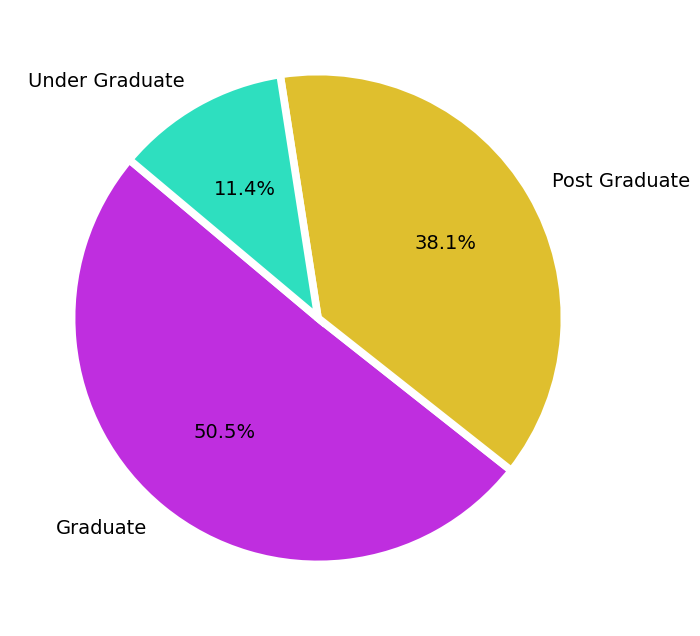

In [41]:
# Menghitung frekuensi masing-masing nilai pendidikan (education)
education_counts = df_clean['education'].value_counts()

colors_hex = ['#bf2edf', '#dfbf2e', '#2edfbf']
# Membuat gambar diagram pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14},
        wedgeprops={'edgecolor': 'white', 'linewidth': 5.5},colors=colors_hex)
plt.show()

Insight : 50.5% of customers have a "Graduate" level of education

### User Income

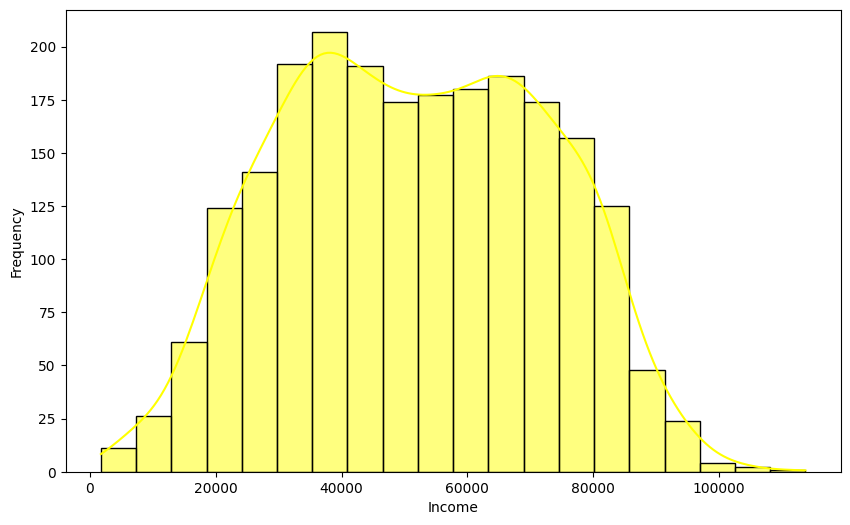

In [42]:
# Membuat gambar histogram (histplot) dari kolom 'income'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='income', bins=20, kde=True, color='yellow')
#plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

desc_clean_income = df_clean['income'].describe()
desc_clean_income.loc['kurtosis'] = df_clean['income'].kurt() #show kurtosis statistic
desc_clean_income.loc['skewness'] = df_clean['income'].skew() #show Skewness statistic
desc_clean_income.loc['variance'] = df_clean['income'].var() #show variance statistic
desc_clean_income.round(2)

count           2205.000
mean           51622.090
std            20713.060
min             1730.000
25%            35196.000
50%            51287.000
75%            68281.000
max           113734.000
kurtosis          -0.850
skewness           0.010
variance   429031013.050
Name: income, dtype: float64

Insight :    
1.   The lowest income in this dataset is **1,730 USD**, while the highest income is **113,734 USD**.
2.  The average income (income) from the data is about  **51,622.09 USD**.
3.  The kurtosis value of **-0.850** indicates that the income distribution has a relatively flat peak compared to the normal distribution (mesokurtic).
4.  Skewness is very close to zero **(0.010)**, indicating that the income distribution is **almost symmetrical**.
5. The large variance value, approximately **429,031,013,050**, indicates a significant variation in income. This high value represents a **significant squared difference** between the data points and average income.


### User Living Status

In [44]:
df_clean['living_status'].describe()

count        2205
unique          2
top       Partner
freq         1422
Name: living_status, dtype: object

In [45]:
living_status = df_clean.groupby('living_status')['id'].nunique() #Count the id as users and group it by the living_status
living_status = living_status.reset_index()   #Reset the index to make it into a pandas dataframe
living_status

,living_status,id
0,Alone,783
1,Partner,1422


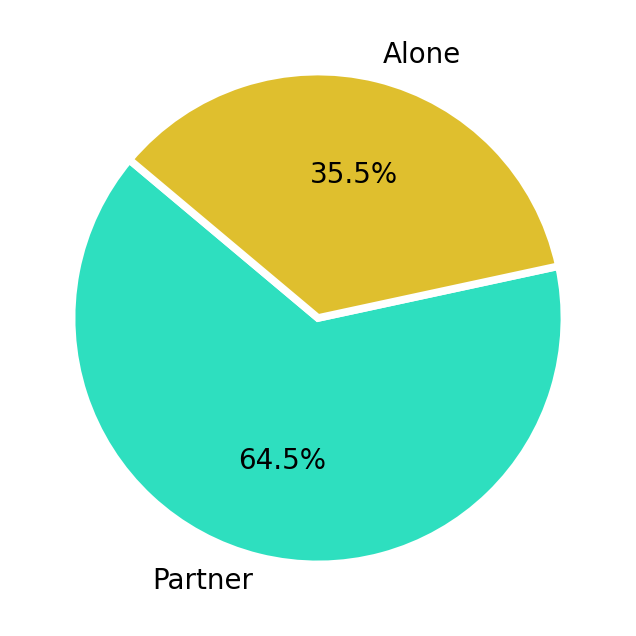

In [46]:
# Menghitung frekuensi masing-masing nilai pendidikan (education)
liv_status_counts = df_clean['living_status'].value_counts()

colors_hex = ['#2edfbf', '#dfbf2e', ]
# Membuat gambar diagram pie chart
plt.figure(figsize=(8, 8))
plt.pie(liv_status_counts, labels=liv_status_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20},
        wedgeprops={'edgecolor': 'white', 'linewidth': 5.5},colors=colors_hex)
plt.show()

Insight :    the majority of customers live with a partner

### User Children

In [47]:
df_clean['children'].describe()

count   2205.000
mean       0.949
std        0.749
min        0.000
25%        0.000
50%        1.000
75%        1.000
max        3.000
Name: children, dtype: float64

In [48]:
children = df_clean.groupby('children')['id'].nunique() #Count the id as users and group it by the total childrens
children = children.reset_index()   #Reset the index to make it into a pandas dataframe
children

,children,id
0,0,628
1,1,1112
2,2,415
3,3,50


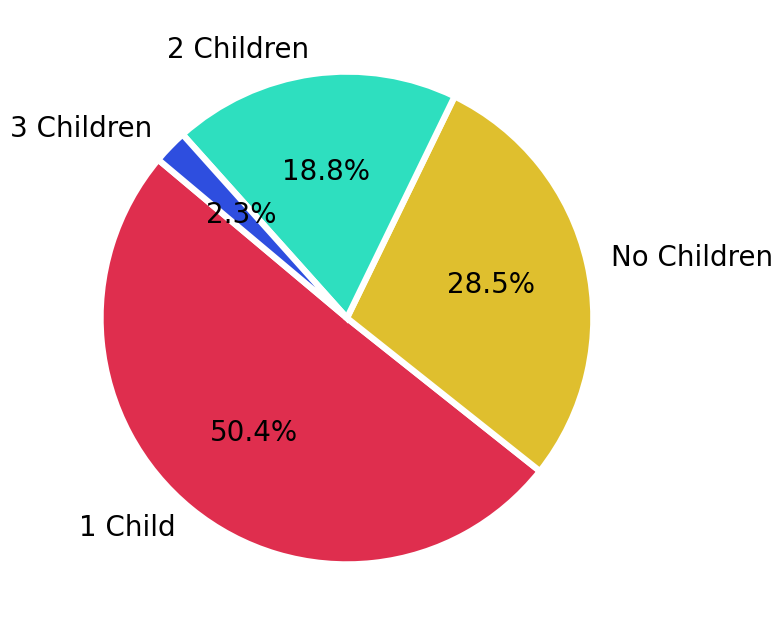

In [49]:
# Menghitung frekuensi masing-masing nilai pendidikan (education)
children_counts = df_clean['children'].value_counts()

# Definisikan keterangan label baru
label_mapping = {
    0: 'No Children',
    1: '1 Child',
    2: '2 Children',
    3: '3 Children',
}
# Menentukan warna dengan warna cerah
colors_hex = ['#df2e4e', '#dfbf2e', '#2edfbf','#2e4edf']

explode = (0.0, 0.0, 0.0, 0.0)

# Mengganti nilai label dengan keterangan label baru
children_counts.index = children_counts.index.map(label_mapping)

# Membuat gambar diagram pie chart
plt.figure(figsize=(8, 8))
plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20},explode=explode,
        wedgeprops={'edgecolor': 'white', 'linewidth': 4.5},colors=colors_hex)  # Menambahkan garis tepi disekitar potongan pie

#plt.title('Children Distribution')
plt.show()

Insight :    
The majority of customers have 1 child or no children, while the proportion of customers with 2 or 3 children is lower, indicating that the majority of customers tend to have families of small size or no children.

### User Complain

In [50]:
df_clean['complain'].describe()

count   2205.000
mean       0.009
std        0.095
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: complain, dtype: float64

In [51]:
user_complain = df_clean.groupby(['complain'])['id'].count().reset_index()
user_complain.rename(columns={'id': 'Number of Users'}, inplace=True)
user_complain['complain'] = user_complain['complain'].map({0: 'No Complain', 1: 'Complain'})
user_complain

,complain,Number of Users
0,No Complain,2185
1,Complain,20


## what products are the most purchased in the market?

### Wine

In [52]:
df_clean['wine'].describe()

count   2205.000
mean     306.165
std      337.494
min        0.000
25%       24.000
50%      178.000
75%      507.000
max     1493.000
Name: wine, dtype: float64

In [53]:
# Menghitung total keseluruhan pembelian wine yang nilai pembelian >= 1
total_wine_buyers = df_clean[df_clean['wine'] >= 1]['id'].nunique()

# Menghitung total pembelian wine
total_wine_purchase = df_clean[df_clean['wine'] >= 1]['wine'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_wine = pd.DataFrame({'Total Wine Purchased': [total_wine_purchase], 'Total Wine Buyers': [total_wine_buyers]}, index=['Grand Total'])

# Menampilkan hasil
print(total_wine)

             Total Wine Purchased  Total Wine Buyers
Grand Total                675093               2192


### Fruit

In [54]:
df_clean['fruit'].describe()

count   2205.000
mean      26.403
std       39.784
min        0.000
25%        2.000
50%        8.000
75%       33.000
max      199.000
Name: fruit, dtype: float64

In [55]:
# Menghitung total keseluruhan pembelian fruit yang nilai pembelian >= 1
total_fruit_buyers = df_clean[df_clean['fruit'] >= 1]['id'].nunique()

# Menghitung total pembelian fruit
total_fruit_purchase = df_clean[df_clean['fruit'] >= 1]['fruit'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_fruit = pd.DataFrame({'Total Fruits Purchased': [total_fruit_purchase], 'Total Fruits Buyers': [total_fruit_buyers]}, index=['Grand Total'])

# Menampilkan hasil
print(total_fruit)

             Total Fruits Purchased  Total Fruits Buyers
Grand Total                   58219                 1812


### Meat

In [56]:
df_clean['meat'].describe()

count   2205.000
mean     165.312
std      217.785
min        0.000
25%       16.000
50%       68.000
75%      232.000
max     1725.000
Name: meat, dtype: float64

In [57]:
# Menghitung total keseluruhan pembelian fruit yang nilai pembelian >= 1
total_meat_buyers = df_clean[df_clean['meat'] >= 1]['id'].nunique()

# Menghitung total pembelian fruit
total_meat_purchase = df_clean[df_clean['meat'] >= 1]['meat'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_meat = pd.DataFrame({'Total Meats Purchased': [total_meat_purchase], 'Total Meats Buyers': [total_meat_buyers]}, index=['Grand Total'])

# Menampilkan hasil
print(total_meat)

             Total Meats Purchased  Total Meats Buyers
Grand Total                 364513                2204


### Fish

In [58]:
df_clean['fish'].describe()

count   2205.000
mean      37.756
std       54.825
min        0.000
25%        3.000
50%       12.000
75%       50.000
max      259.000
Name: fish, dtype: float64

In [59]:
# Menghitung total keseluruhan pembelian fruit yang nilai pembelian >= 1
total_fish_buyers = df_clean[df_clean['fish'] >= 1]['id'].nunique()

# Menghitung total pembelian fruit
total_fish_purchase = df_clean[df_clean['fish'] >= 1]['fish'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_fish = pd.DataFrame({'Total Fish Purchased': [total_fish_purchase], 'Total Fish Buyers': [total_fish_buyers]}, index=['Grand Total'])

# Menampilkan hasil
print(total_fish)

             Total Fish Purchased  Total Fish Buyers
Grand Total                 83253               1826


### Sweet

In [60]:
df_clean['sweet'].describe()

count   2205.000
mean      27.128
std       41.130
min        0.000
25%        1.000
50%        8.000
75%       34.000
max      262.000
Name: sweet, dtype: float64

In [61]:
# Menghitung total keseluruhan pembelian fruit yang nilai pembelian >= 1
total_sweet_buyers = df_clean[df_clean['sweet'] >= 1]['id'].nunique()

# Menghitung total pembelian fruit
total_sweet_purchase = df_clean[df_clean['sweet'] >= 1]['sweet'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_sweet = pd.DataFrame({'Total Sweets Purchased': [total_sweet_purchase], 'Total Sweet Buyers': [total_sweet_buyers]}, index=['Grand Total'])

# Menampilkan hasil
print(total_sweet)

             Total Sweets Purchased  Total Sweet Buyers
Grand Total                   59818                1794


### Gold

In [62]:
df_clean['gold'].describe()

count   2205.000
mean      44.057
std       51.736
min        0.000
25%        9.000
50%       25.000
75%       56.000
max      321.000
Name: gold, dtype: float64

In [63]:
# Menghitung total keseluruhan pembelian fruit yang nilai pembelian >= 1
total_gold_buyers = df_clean[df_clean['gold'] >= 1]['id'].nunique()

# Menghitung total pembelian fruit
total_gold_purchase = df_clean[df_clean['gold'] >= 1]['gold'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_gold = pd.DataFrame({'Total Gold Purchased': [total_gold_purchase], 'Total Gold Buyers': [total_gold_buyers]}, index=['Grand Total'])

# Menampilkan hasil
print(total_gold)

             Total Gold Purchased  Total Gold Buyers
Grand Total                 97146               2144


### Acumulated total product

In [64]:
# Daftar kolom yang ingin dihitung total pembeliannya
columns_to_sum = ['wine', 'fruit', 'meat', 'fish', 'sweet', 'gold']

# Membuat DataFrame baru untuk menyimpan hasil perhitungan
total_data_product = pd.DataFrame(columns=['Total Purchased', 'Total Buyers', 'Buyers Percentage'])

# Menghitung total pembeli unik untuk Grand Total
grand_total_buyers = df_clean[df_clean[columns_to_sum].sum(axis=1) >= 0]['id'].nunique()

# Menghitung total pembelian dan pembeli unik untuk setiap kolom
for column in columns_to_sum:
    total_buyers = df_clean[df_clean[column] >= 1]['id'].nunique()
    total_purchase = df_clean[df_clean[column] >= 1][column].sum()
    buyers_percentage = (total_buyers / grand_total_buyers) * 100
    total_data_product.loc[column] = [total_purchase, total_buyers, buyers_percentage]



# Menghitung total pembelian dan pembeli unik untuk Grand Total
grand_total_data = pd.Series({
    'Total Purchased': total_data_product['Total Purchased'].sum(),
    'Total Buyers': grand_total_buyers,
    'Buyers Percentage': 100  # Persentase selalu 100% untuk Grand Total
}, name='Grand Total')
total_data_product = total_data_product.append(grand_total_data)

# Menampilkan hasil
total_data_product.index = columns_to_sum + ['Grand Total']
print(total_data_product)

             Total Purchased  Total Buyers  Buyers Percentage
wine              675093.000      2192.000             99.410
fruit              58219.000      1812.000             82.177
meat              364513.000      2204.000             99.955
fish               83253.000      1826.000             82.812
sweet              59818.000      1794.000             81.361
gold               97146.000      2144.000             97.234
Grand Total      1338042.000      2205.000            100.000


<ipython-input-64-ac0bab67cac9>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data_product = total_data_product.append(grand_total_data)


#### bar chart

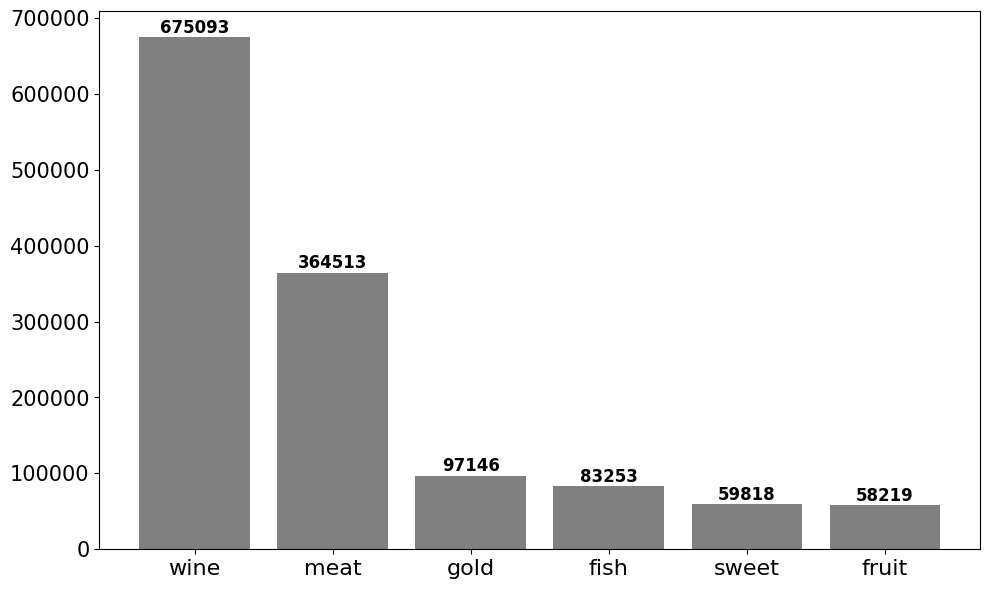

In [65]:
# Mengurutkan data berdasarkan total pembelian dari yang terbesar
total_data_sorted = total_data_product.sort_values(by='Total Purchased', ascending=False)

# Menghilangkan baris Grand Total dari DataFrame yang akan digunakan dalam grafik
total_data_sorted = total_data_sorted.drop('Grand Total')

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(total_data_sorted.index, total_data_sorted['Total Purchased'],color='gray')
#plt.xlabel('Product', fontsize=14, fontweight='bold')
#plt.ylabel('Total Purchased', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=16,)#fontweight='bold')
plt.yticks(rotation=0, fontsize=15,)#fontweight='bold')

# Menampilkan nilai pada masing-masing batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(False)
plt.tight_layout()
plt.show()

#### treemap chart

In [66]:
# Daftar kolom yang ingin dihitung total pembeliannya
col_to_sum = ['wine', 'fruit', 'meat', 'fish', 'sweet', 'gold']

# Membuat dictionary untuk menyimpan total pembelian masing-masing produk
total_purchase_dict = {}

for column in col_to_sum:
    total_purchase = df_clean[df_clean[column] >= 1][column].sum()
    total_purchase_dict[column] = total_purchase

# Mengubah dictionary menjadi pandas DataFrame
total_purchase_df = pd.DataFrame(total_purchase_dict.items(), columns=['Product', 'Total Purchase'])

# Menampilkan DataFrame
print(total_purchase_df)

  Product  Total Purchase
0    wine          675093
1   fruit           58219
2    meat          364513
3    fish           83253
4   sweet           59818
5    gold           97146


In [67]:
import plotly.express as px

# Membuat treemap chart dari DataFrame total_purchase_df
fig = px.treemap(
    total_purchase_df,
    path=['Product'],
    values='Total Purchase',
    color_discrete_sequence=['#333333', '#4C4C4C', '#666666', '#7F7F7F', '#999999', '#E5E5E5']
)

# Mengatur ukuran teks pada keterangan
fig.update_traces(textfont=dict(size=38))  # Ganti 18 dengan ukuran teks yang Anda inginkan

# Menampilkan treemap chart
fig.show()

## Where users buy their product?

### Website

In [68]:
df_clean['numwebpurchases'].describe()

count   2205.000
mean       4.101
std        2.737
min        0.000
25%        2.000
50%        4.000
75%        6.000
max       27.000
Name: numwebpurchases, dtype: float64

In [69]:
# Menghitung total keseluruhan pembeli menggunakan Website yang nilai pembelian >= 1
total_web_buyers = df_clean[df_clean['numwebpurchases'] >= 1]['id'].nunique()

# Menghitung total pembelian di Website
total_web_purchase = df_clean[df_clean['numwebpurchases'] >= 1]['numwebpurchases'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_web = pd.DataFrame({'Total in Web Purchased': [total_web_purchase], 'Total Web Buyers': [total_web_buyers]}, index=['Grand Total'])

# Menampilkan hasil
print(total_web)

             Total in Web Purchased  Total Web Buyers
Grand Total                    9042              2163


### Catalog

In [70]:
df_clean['numcatalogpurchases'].describe()

count   2205.000
mean       2.645
std        2.799
min        0.000
25%        0.000
50%        2.000
75%        4.000
max       28.000
Name: numcatalogpurchases, dtype: float64

In [71]:
# Menghitung total keseluruhan pembeli menggunakan Catalog yang nilai pembelian >= 1
total_catalog_buyers = df_clean[df_clean['numcatalogpurchases'] >= 1]['id'].nunique()

# Menghitung total pembelian di Catalog
total_catalog_purchase = df_clean[df_clean['numcatalogpurchases'] >= 1]['numcatalogpurchases'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_catalog = pd.DataFrame({'Total in Catalog Purchased': [total_catalog_purchase], 'Total Catalog Buyers': [total_catalog_buyers]}, index=['Grand Total'])

# Menampilkan hasil
print(total_catalog)

             Total in Catalog Purchased  Total Catalog Buyers
Grand Total                        5833                  1634


### Store

In [72]:
df_clean['numstorepurchases'].describe()

count   2205.000
mean       5.824
std        3.242
min        0.000
25%        3.000
50%        5.000
75%        8.000
max       13.000
Name: numstorepurchases, dtype: float64

In [73]:
# Menghitung total keseluruhan pembeli langsung melalui Store yang nilai pembelian >= 1
total_store_buyers = df_clean[df_clean['numstorepurchases'] >= 1]['id'].nunique()

# Menghitung total pembelian melalui Store
total_store_purchase = df_clean[df_clean['numstorepurchases'] >= 1]['numstorepurchases'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_store = pd.DataFrame({'Total in Store Purchased': [total_store_purchase], 'Total Store Buyers': [total_store_buyers]}, index=['Grand Total'])

# Menampilkan hasil
print(total_store)

             Total in Store Purchased  Total Store Buyers
Grand Total                     12841                2195


### Acumulated multiple purchase platforms

In [74]:
# Daftar kolom yang ingin dihitung total pembeliannya
columns_to_sum = ['numwebpurchases', 'numcatalogpurchases','numstorepurchases']

# Membuat DataFrame baru untuk menyimpan hasil perhitungan
total_data_platform = pd.DataFrame(columns=['Total Purchased', 'Total Buyers', 'Buyers Percentage'])

# Menghitung total pembelian dan pembeli unik untuk setiap kolom
for column in columns_to_sum:
    total_buyers = df_clean[df_clean[column] >= 1]['id'].nunique()
    total_purchase = df_clean[df_clean[column] >= 1][column].sum()
    buyers_percentage = (total_buyers / grand_total_buyers) * 100
    total_data_platform.loc[column] = [total_purchase, total_buyers, buyers_percentage]

# Menghitung total pembeli unik untuk Grand Total
grand_total_buyers = df_clean[df_clean[columns_to_sum].sum(axis=1) >= 0]['id'].nunique()

# Menghitung total pembelian dan pembeli unik untuk Grand Total
grand_total_data = pd.Series({
    'Total Purchased': total_data_platform['Total Purchased'].sum(),
    'Total Buyers': grand_total_buyers,
    'Buyers Percentage': 100  # Persentase selalu 100% untuk Grand Total
}, name='Grand Total')
total_data_platform = total_data_platform.append(grand_total_data)

# Menampilkan hasil
total_data_platform.index = columns_to_sum + ['Grand Total']
print(total_data_platform)

                     Total Purchased  Total Buyers  Buyers Percentage
numwebpurchases             9042.000      2163.000             98.095
numcatalogpurchases         5833.000      1634.000             74.104
numstorepurchases          12841.000      2195.000             99.546
Grand Total                27716.000      2205.000            100.000


<ipython-input-74-d4c66f354c7d>:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



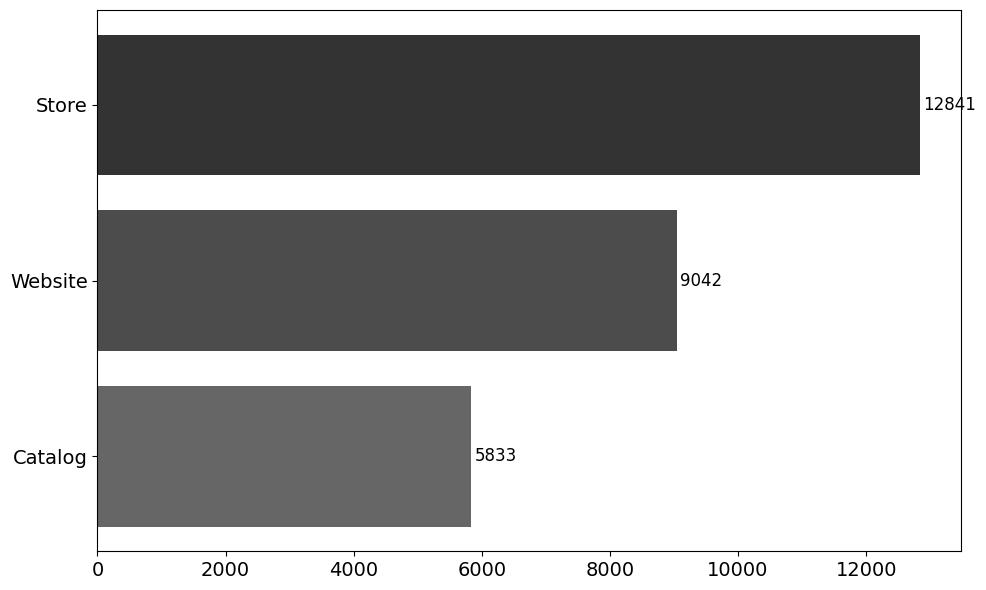

In [75]:
# Daftar kolom yang ingin dihitung total pembeliannya
channel_to_sum = ['numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']

# Dictionary untuk menyimpan total pembelian masing-masing produk
purchase_channel_dict = {}

# Mapping nama kolom ke label yang diinginkan
channel_labels = {
    'numwebpurchases': 'Website',
    'numcatalogpurchases': 'Catalog',
    'numstorepurchases': 'Store'
}

# Menghitung total pembelian masing-masing channel
for column in channel_to_sum:
    total_purchase_channel = df_clean[df_clean[column] >= 1][column].sum()
    purchase_channel_dict[channel_labels[column]] = total_purchase_channel

# Mengubah dictionary menjadi pandas DataFrame
purchase_channel_df = pd.DataFrame(purchase_channel_dict.items(), columns=['Channels', 'Total Purchase'])

# Mengurutkan DataFrame berdasarkan Total Purchase
purchase_channel_df = purchase_channel_df.sort_values(by='Total Purchase', ascending=False)

# Membuat horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(purchase_channel_df['Channels'][::-1], purchase_channel_df['Total Purchase'][::-1], color=['#666666', '#4C4C4C', '#333333'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Total Purchase', fontsize=16)
#plt.ylabel('Channels', fontsize=16)

# Menampilkan nilai pada masing-masing batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 50, bar.get_y() + bar.get_height()/2, round(xval), ha='left', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.grid(False)
plt.show()

## How many users buy product with discount?




In [76]:
df_clean['numdealspurchases'].describe()

count   2205.000
mean       2.318
std        1.886
min        0.000
25%        1.000
50%        2.000
75%        3.000
max       15.000
Name: numdealspurchases, dtype: float64

In [77]:
# Menghitung total keseluruhan pembeli langsung melalui Store yang nilai pembelian >= 1
total_disc_users = df_clean[df_clean['numdealspurchases'] >= 1]['id'].nunique()

# Menghitung total pembelian melalui Store
total_disc_purchase = df_clean[df_clean['numdealspurchases'] >= 1]['numdealspurchases'].sum()

# Membuat DataFrame baru untuk menampilkan total keseluruhan
total_disc = pd.DataFrame({'Total Discount Purchased': [total_disc_purchase], 'Total Discount Users': [total_disc_users]}, index=['Grand Total'])

# Menampilkan hasil
print(total_disc)

             Total Discount Purchased  Total Discount Users
Grand Total                      5112                  2166


Insight :    
1.   There are **5,112** total purchases made using a discount
2.   There are **2,166** out of 2205 customers who use discounts to make purchases

In [78]:
df_clean.head()

,id,education,income,kidhome,teenhome,dt_customer,recency,wine,fruit,meat,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,living_status,age,spent,children,family_size
0,05524,Graduate,58138.000,0,0,2012-04-09,58,635,88,546,...,0,0,0,0,1,Alone,66,1617,0,1
1,02174,Graduate,46344.000,1,1,2014-08-03,38,11,1,6,...,0,0,0,0,0,Alone,69,27,2,3
2,04141,Graduate,71613.000,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,Partner,58,776,0,2
3,06182,Graduate,26646.000,1,0,2014-10-02,26,11,4,20,...,0,0,0,0,0,Partner,39,53,1,3
4,05324,Post Graduate,58293.000,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,Partner,42,422,1,3


## Campaign

In [79]:
# Daftar kolom yang ingin dihitung total pembeliannya
campaign_to_sum = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'response']

# Membuat DataFrame baru untuk menyimpan hasil perhitungan
total_data_campaign = pd.DataFrame(columns=['Total Accepted Campaign', 'Accepted Percentage'])

# Menghitung total pembeli unik untuk Grand Total
grand_total_users = df_clean[df_clean[campaign_to_sum].sum(axis=1) >= 0]['id'].nunique()

# Menghitung total pembelian dan pembeli unik untuk setiap kolom
for column in campaign_to_sum:
    total_acc_cmp = df_clean[df_clean[column] >= 1]['id'].nunique()
    acc_percentage = (total_acc_cmp / grand_total_users) * 100
    total_data_campaign.loc[column] = [total_acc_cmp, acc_percentage]


# Menghitung total pembelian dan pembeli unik untuk Grand Total
grand_total_data = pd.Series({
    'Total Accepted Campaign': total_data_campaign['Total Accepted Campaign'].sum(),
    'Accepted Percentage': total_data_campaign['Accepted Percentage'].sum()
}, name='Grand Total')
total_data_campaign = total_data_campaign.append(grand_total_data)

# Menampilkan hasil
total_data_campaign.index = campaign_to_sum + ['Grand Total']
print(total_data_campaign)

              Total Accepted Campaign  Accepted Percentage
acceptedcmp1                  142.000                6.440
acceptedcmp2                   30.000                1.361
acceptedcmp3                  163.000                7.392
acceptedcmp4                  164.000                7.438
acceptedcmp5                  161.000                7.302
response                      333.000               15.102
Grand Total                   993.000               45.034


<ipython-input-79-f2acd6bcaf2d>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



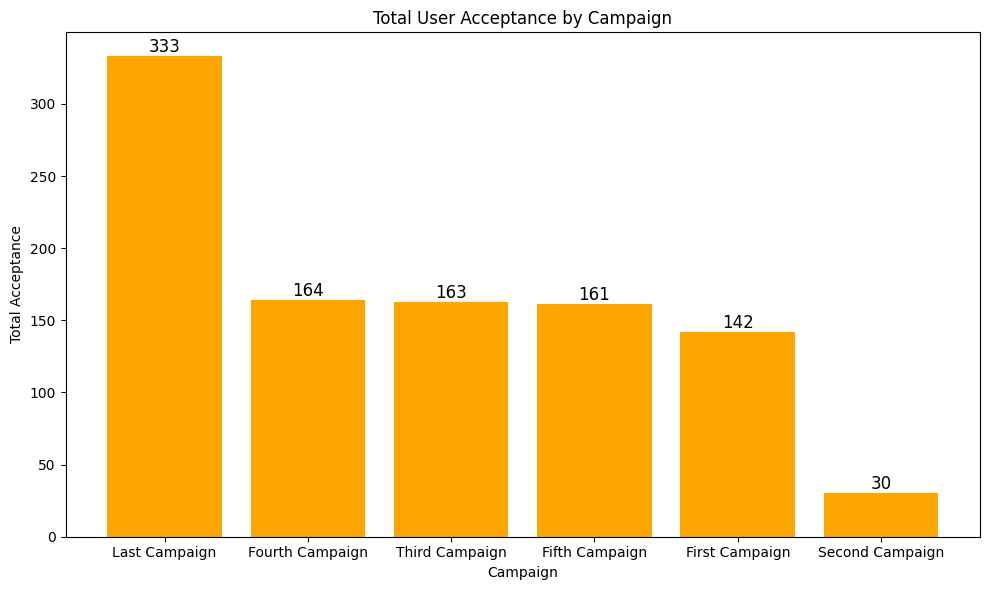

In [80]:
# Mapping nama-nama campaign
campaign_mapping = {
    'response': 'Last Campaign',
    'acceptedcmp1': 'First Campaign',
    'acceptedcmp2': 'Second Campaign',
    'acceptedcmp3': 'Third Campaign',
    'acceptedcmp4': 'Fourth Campaign',
    'acceptedcmp5': 'Fifth Campaign'
}

# Mengurutkan data berdasarkan total pembelian dari yang terbesar
total_data_sorted = total_data_campaign.sort_values(by='Total Accepted Campaign', ascending=False)

# Menghilangkan baris Grand Total dari DataFrame yang akan digunakan dalam grafik
total_data_sorted = total_data_sorted.drop('Grand Total')

# Mengganti nama campaign dengan mapping yang telah didefinisikan
total_data_sorted.index = total_data_sorted.index.map(campaign_mapping)

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(total_data_sorted.index, total_data_sorted['Total Accepted Campaign'],color='orange')
plt.title('Total User Acceptance by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Total Acceptance')
plt.xticks(rotation=0)

# Menampilkan nilai pada masing-masing batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.grid(False)
plt.show()

Insight :     
most customers accepted the offers in the last campaign

DataFrame Total Data Campaign:
             Total Accepted Campaign  Total Rejected Campaign
Grand Total                      993                     1212



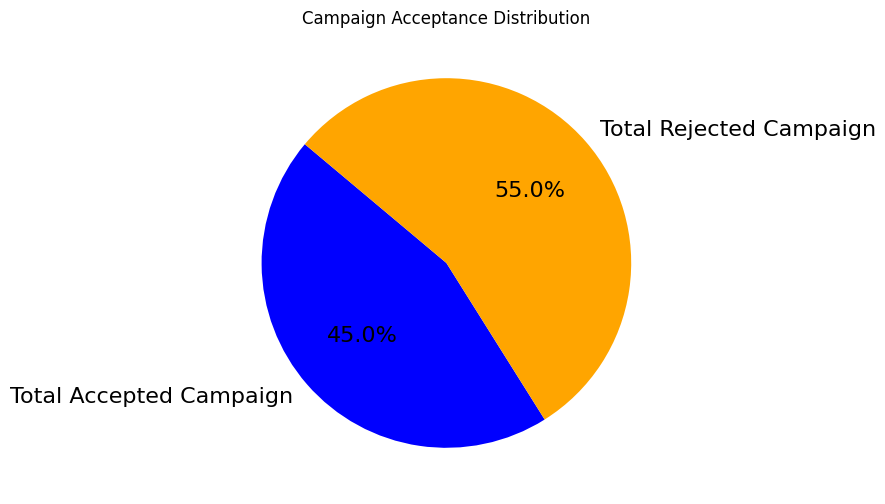

In [81]:
# Membuat DataFrame baru untuk menyimpan hasil perhitungan
total_data_campaign2 = pd.DataFrame(columns=['Total Accepted Campaign', 'Total Rejected Campaign'])

# Menghitung total pembeli unik untuk Grand Total
grand_total_users = df_clean['id'].nunique()

# Menghitung total accepted campaign dan total rejected campaign
total_accepted_campaign = df_clean[campaign_to_sum].sum().sum()
total_rejected_campaign = grand_total_users - total_accepted_campaign

# Menambahkan data ke DataFrame total_data_campaign
total_data_campaign2.loc['Grand Total'] = [total_accepted_campaign, total_rejected_campaign]

# Menampilkan hasil DataFrame total_data_campaign
print("DataFrame Total Data Campaign:")
print(total_data_campaign2)
print()

# Membuat pie chart
labels = ['Total Accepted Campaign', 'Total Rejected Campaign']
sizes = total_data_campaign2.loc['Grand Total'].values
colors = ['blue', 'orange']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Campaign Acceptance Distribution')

# Menampilkan pie chart
plt.show()

# Segmentation

In [82]:
df_clean

,id,education,income,kidhome,teenhome,dt_customer,recency,wine,fruit,meat,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,living_status,age,spent,children,family_size
0,05524,Graduate,58138.000,0,0,2012-04-09,58,635,88,546,...,0,0,0,0,1,Alone,66,1617,0,1
1,02174,Graduate,46344.000,1,1,2014-08-03,38,11,1,6,...,0,0,0,0,0,Alone,69,27,2,3
2,04141,Graduate,71613.000,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,Partner,58,776,0,2
3,06182,Graduate,26646.000,1,0,2014-10-02,26,11,4,20,...,0,0,0,0,0,Partner,39,53,1,3
4,05324,Post Graduate,58293.000,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,Partner,42,422,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduate,61223.000,0,1,2013-06-13,46,709,43,182,...,0,0,0,0,0,Partner,56,1341,1,3
2236,04001,Post Graduate,64014.000,2,1,2014-10-06,56,406,0,30,...,0,1,0,0,0,Partner,77,444,3,5
2237,07270,Graduate,56981.000,0,0,2014-01-25,91,908,48,217,...,0,0,0,0,0,Alone,42,1241,0,1
2238,08235,Post Graduate,69245.000,0,1,2014-01-24,8,428,30,214,...,0,0,0,0,0,Partner,67,843,1,3


In [83]:
df_clean.columns

Index(['id', 'education', 'income', 'kidhome', 'teenhome', 'dt_customer',
       'recency', 'wine', 'fruit', 'meat', 'fish', 'sweet', 'gold',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'response', 'living_status', 'age', 'spent', 'children',
       'family_size'],
      dtype='object')

## Preparing Segmentation Features

In [84]:
# CLUSTER
from sklearn.cluster import KMeans
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [85]:
df_feature = df_clean.copy()

In [86]:
df_feature.drop(columns = ['kidhome','teenhome','recency'], inplace = True)
df_feature.columns

Index(['id', 'education', 'income', 'dt_customer', 'wine', 'fruit', 'meat',
       'fish', 'sweet', 'gold', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response', 'living_status', 'age', 'spent',
       'children', 'family_size'],
      dtype='object')

## Check Data Distribution

In [87]:
df_segmentation_feature = df_clean[['age', 'income', 'spent', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']]
df_segmentation_feature

,age,income,spent,numwebpurchases,numcatalogpurchases,numstorepurchases
0,66,58138.000,1617,8,10,4
1,69,46344.000,27,1,1,2
2,58,71613.000,776,8,2,10
3,39,26646.000,53,2,0,4
4,42,58293.000,422,5,3,6
...,...,...,...,...,...,...
2235,56,61223.000,1341,9,3,4
2236,77,64014.000,444,8,2,5
2237,42,56981.000,1241,2,3,13
2238,67,69245.000,843,6,5,10


in this section we will try several types of scaling in the data, before finally deciding to use what scaling is suitable for customer segmentation in this case

### Non Scaler

<Axes: xlabel='age', ylabel='income'>

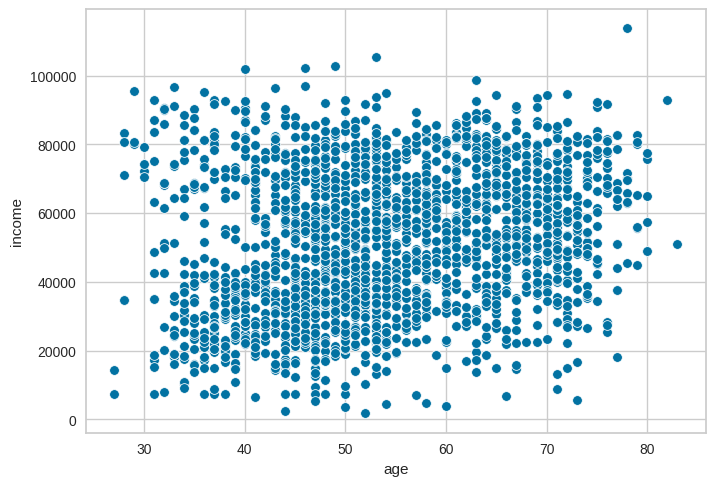

In [88]:
sns.scatterplot(data = df_segmentation_feature, x='age', y='income')

<Axes: xlabel='age', ylabel='spent'>

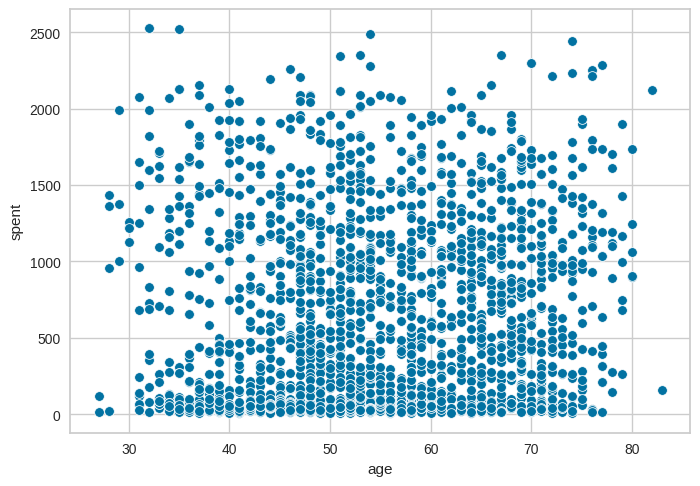

In [89]:
sns.scatterplot(data = df_segmentation_feature, x='age', y='spent')

### Standard Scaler

In [90]:
# Define Standard Scale dataset
ss_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<Axes: xlabel='age', ylabel='spent'>

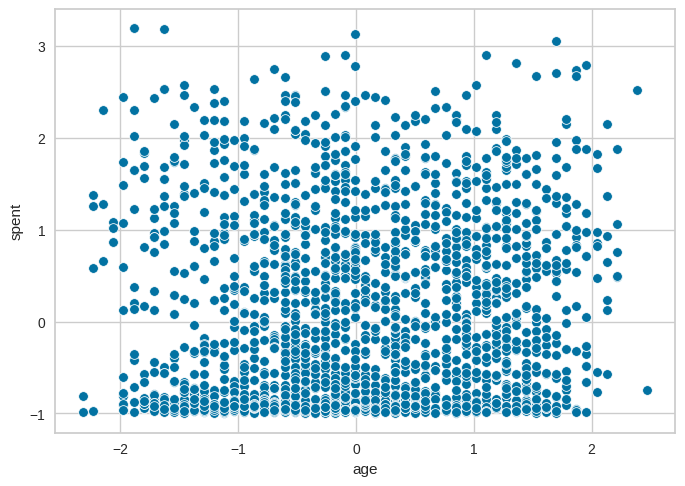

In [91]:
sns.scatterplot(data = ss_scale_df, x='age', y='spent')

### Robust Scaler

In [92]:
# Define Robust Scale dataset
rs_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[column] = rs_scaler.fit_transform(rs_scale_df[column])

<Axes: xlabel='age', ylabel='spent'>

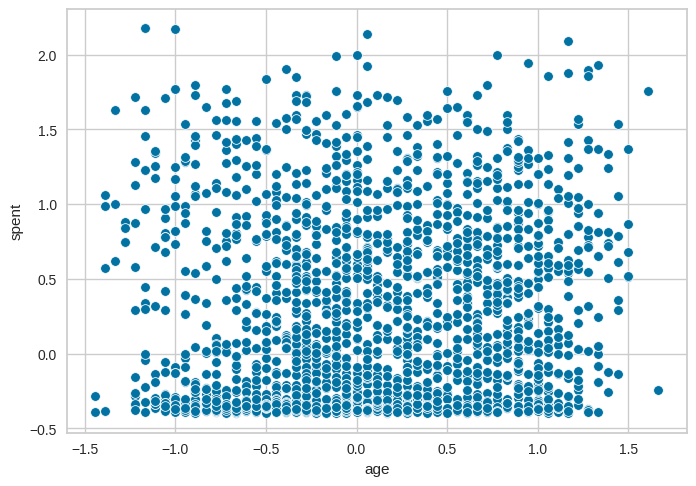

In [93]:
sns.scatterplot(data = rs_scale_df, x='age', y='spent')

### MinMax Scaler

In [94]:
# Define Minmax Scale dataset
mm_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[column] = mm_scaler.fit_transform(mm_scale_df[column])

<Axes: xlabel='age', ylabel='spent'>

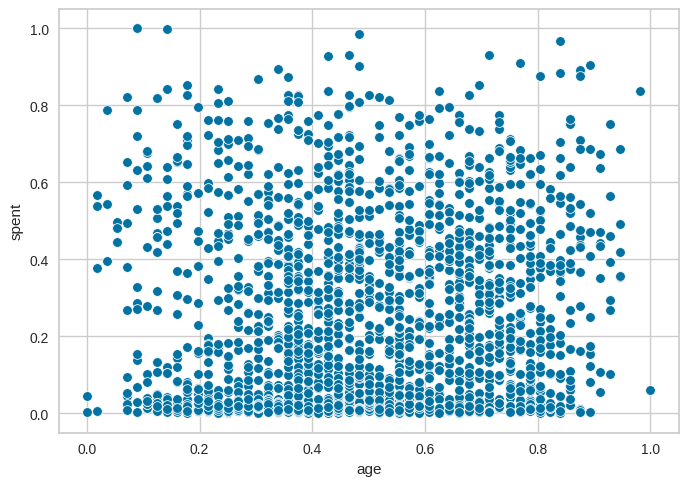

In [95]:
sns.scatterplot(data = mm_scale_df, x='age', y='spent')

## Cluster

In [96]:
df_clustering = df_feature.copy()
df_clustering

,id,education,income,dt_customer,wine,fruit,meat,fish,sweet,gold,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,living_status,age,spent,children,family_size
0,05524,Graduate,58138.000,2012-04-09,635,88,546,172,88,88,...,0,0,0,0,1,Alone,66,1617,0,1
1,02174,Graduate,46344.000,2014-08-03,11,1,6,2,1,6,...,0,0,0,0,0,Alone,69,27,2,3
2,04141,Graduate,71613.000,2013-08-21,426,49,127,111,21,42,...,0,0,0,0,0,Partner,58,776,0,2
3,06182,Graduate,26646.000,2014-10-02,11,4,20,10,3,5,...,0,0,0,0,0,Partner,39,53,1,3
4,05324,Post Graduate,58293.000,2014-01-19,173,43,118,46,27,15,...,0,0,0,0,0,Partner,42,422,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduate,61223.000,2013-06-13,709,43,182,42,118,247,...,0,0,0,0,0,Partner,56,1341,1,3
2236,04001,Post Graduate,64014.000,2014-10-06,406,0,30,0,0,8,...,0,1,0,0,0,Partner,77,444,3,5
2237,07270,Graduate,56981.000,2014-01-25,908,48,217,32,12,24,...,0,0,0,0,0,Alone,42,1241,0,1
2238,08235,Post Graduate,69245.000,2014-01-24,428,30,214,80,30,61,...,0,0,0,0,0,Partner,67,843,1,3


In [97]:
# drop column that won't include in the clustering
df_clustering.drop(columns = ['id','dt_customer','children','family_size',
                               'acceptedcmp3','acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2','response'], inplace = True)

### One Hot Encoding

In [98]:
dum_df =pd.get_dummies(df_clustering, columns=['living_status', 'education'], prefix=['living_status', 'education'])
dum_df

,income,wine,fruit,meat,fish,sweet,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,age,spent,living_status_Alone,living_status_Partner,education_Graduate,education_Post Graduate,education_Under Graduate
0,58138.000,635,88,546,172,88,88,3,8,10,4,7,0,66,1617,1,0,1,0,0
1,46344.000,11,1,6,2,1,6,2,1,1,2,5,0,69,27,1,0,1,0,0
2,71613.000,426,49,127,111,21,42,1,8,2,10,4,0,58,776,0,1,1,0,0
3,26646.000,11,4,20,10,3,5,2,2,0,4,6,0,39,53,0,1,1,0,0
4,58293.000,173,43,118,46,27,15,5,5,3,6,5,0,42,422,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.000,709,43,182,42,118,247,2,9,3,4,5,0,56,1341,0,1,1,0,0
2236,64014.000,406,0,30,0,0,8,7,8,2,5,7,0,77,444,0,1,0,1,0
2237,56981.000,908,48,217,32,12,24,1,2,3,13,6,0,42,1241,1,0,1,0,0
2238,69245.000,428,30,214,80,30,61,2,6,5,10,3,0,67,843,0,1,0,1,0


### Without Hot Encoding

In [99]:
#dum_df = df_clustering.copy()
#dum_df

In [100]:
dum_df.columns

Index(['income', 'wine', 'fruit', 'meat', 'fish', 'sweet', 'gold',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'complain', 'age', 'spent',
       'living_status_Alone', 'living_status_Partner', 'education_Graduate',
       'education_Post Graduate', 'education_Under Graduate'],
      dtype='object')

In [101]:
col_num = ['income', 'wine', 'fruit', 'meat', 'fish', 'sweet', 'gold',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'complain', 'age', 'spent',
       'living_status_Alone', 'living_status_Partner', 'education_Graduate',
       'education_Post Graduate', 'education_Under Graduate']

### Scaler to Dummy Data

we will use the standardscaler to scale the features that will be used in this clustering method

In [102]:
#standard scaler

scaler = StandardScaler()
dum_df[col_num] = scaler.fit_transform(dum_df[col_num])
dum_df

,income,wine,fruit,meat,fish,sweet,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,age,spent,living_status_Alone,living_status_Partner,education_Graduate,education_Post Graduate,education_Under Graduate
0,0.315,0.975,1.549,1.748,2.449,1.480,0.850,0.361,1.425,2.629,-0.563,0.689,-0.096,1.017,1.679,1.348,-1.348,0.991,-0.784,-0.359
1,-0.255,-0.875,-0.639,-0.732,-0.652,-0.635,-0.736,-0.169,-1.133,-0.588,-1.180,-0.140,-0.096,1.274,-0.964,1.348,-1.348,0.991,-0.784,-0.359
2,0.965,0.355,0.568,-0.176,1.336,-0.149,-0.040,-0.699,1.425,-0.231,1.289,-0.554,-0.096,0.334,0.281,-0.742,0.742,0.991,-0.784,-0.359
3,-1.206,-0.875,-0.563,-0.667,-0.506,-0.587,-0.755,-0.169,-0.768,-0.945,-0.563,0.275,-0.096,-1.290,-0.921,-0.742,0.742,0.991,-0.784,-0.359
4,0.322,-0.395,0.417,-0.217,0.150,-0.003,-0.562,1.422,0.329,0.127,0.054,-0.140,-0.096,-1.034,-0.307,-0.742,0.742,-1.010,1.275,-0.359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.464,1.194,0.417,0.077,0.077,2.210,3.924,-0.169,1.790,0.127,-0.563,-0.140,-0.096,0.163,1.221,-0.742,0.742,0.991,-0.784,-0.359
2236,0.598,0.296,-0.664,-0.621,-0.689,-0.660,-0.697,2.483,1.425,-0.231,-0.254,0.689,-0.096,1.957,-0.271,-0.742,0.742,-1.010,1.275,-0.359
2237,0.259,1.784,0.543,0.237,-0.105,-0.368,-0.388,-0.699,-0.768,0.127,2.214,0.275,-0.096,-1.034,1.054,1.348,-1.348,0.991,-0.784,-0.359
2238,0.851,0.361,0.090,0.224,0.771,0.070,0.328,-0.169,0.694,0.842,1.289,-0.968,-0.096,1.103,0.393,-0.742,0.742,-1.010,1.275,-0.359


### Elbow

***Elbow Method*** is one of the approaches used to select the optimal number of clusters in the K-Means Clustering algorithm. The aim is to determine the point at which increasing the number of clusters will no longer result in a significant decrease in the variability within the data set.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

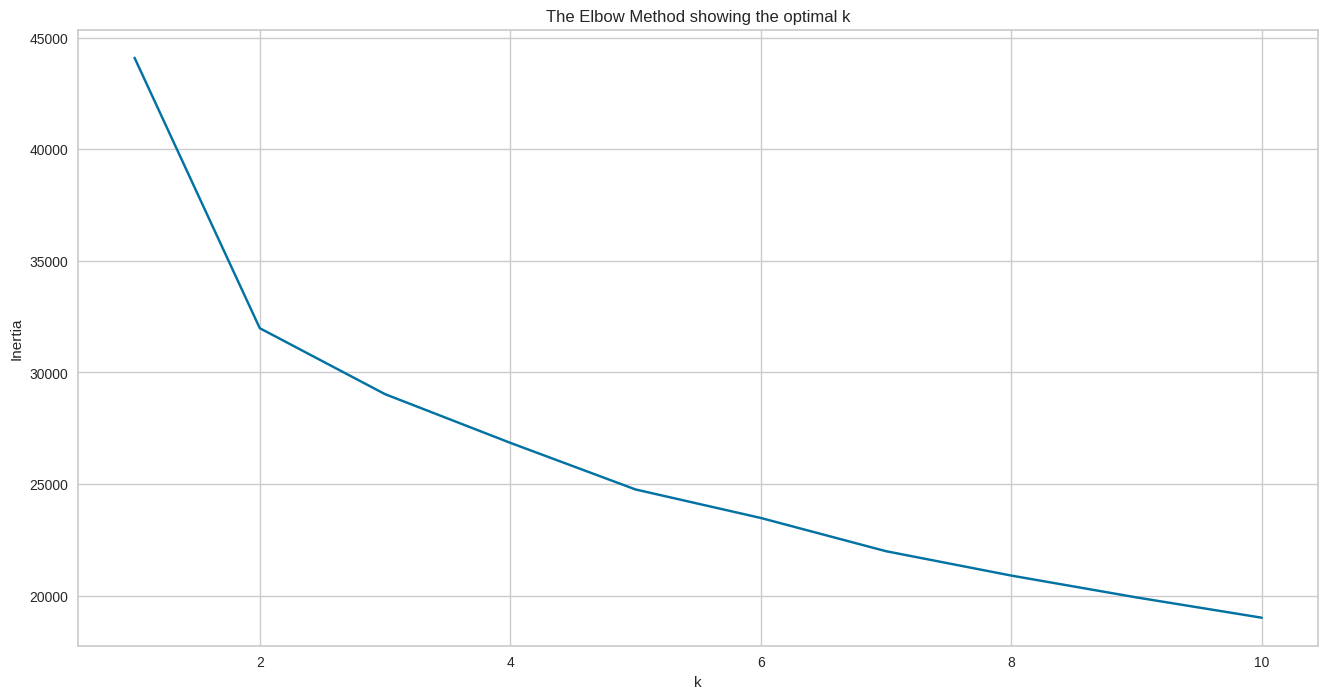

[44099.999999999956, 31984.53654996732, 29030.088795642216, 26849.6177449736, 24760.631033296162, 23483.391665868032, 21994.267506339245, 20902.83324631134, 19924.060521264037, 19014.76333756537]


In [103]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(dum_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt
plt.show()
print(distortions)

Insight :    
Through the Elbow method it is found that the point where the decrease in inertia value begins to slow down, thus forming an elbow-like curve is at K = 2

### Silhouette

***Silhouette Score*** is an evaluation metric that measures how close each data point in a cluster is to other data points in the same cluster compared to other adjacent clusters. This helps us understand how well the clusters are segregated and how well the data is placed within the clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=2, the average silhouette score is 0.2798611461963463


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=3, the average silhouette score is 0.18853124479075128


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=4, the average silhouette score is 0.1642431320488433


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=5, the average silhouette score is 0.17979837642487878


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=6, the average silhouette score is 0.17283848060563847


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=7, the average silhouette score is 0.1939591775521327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=8, the average silhouette score is 0.1952233929430319


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=9, the average silhouette score is 0.1972192994457455


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=10, the average silhouette score is 0.2048421046595858


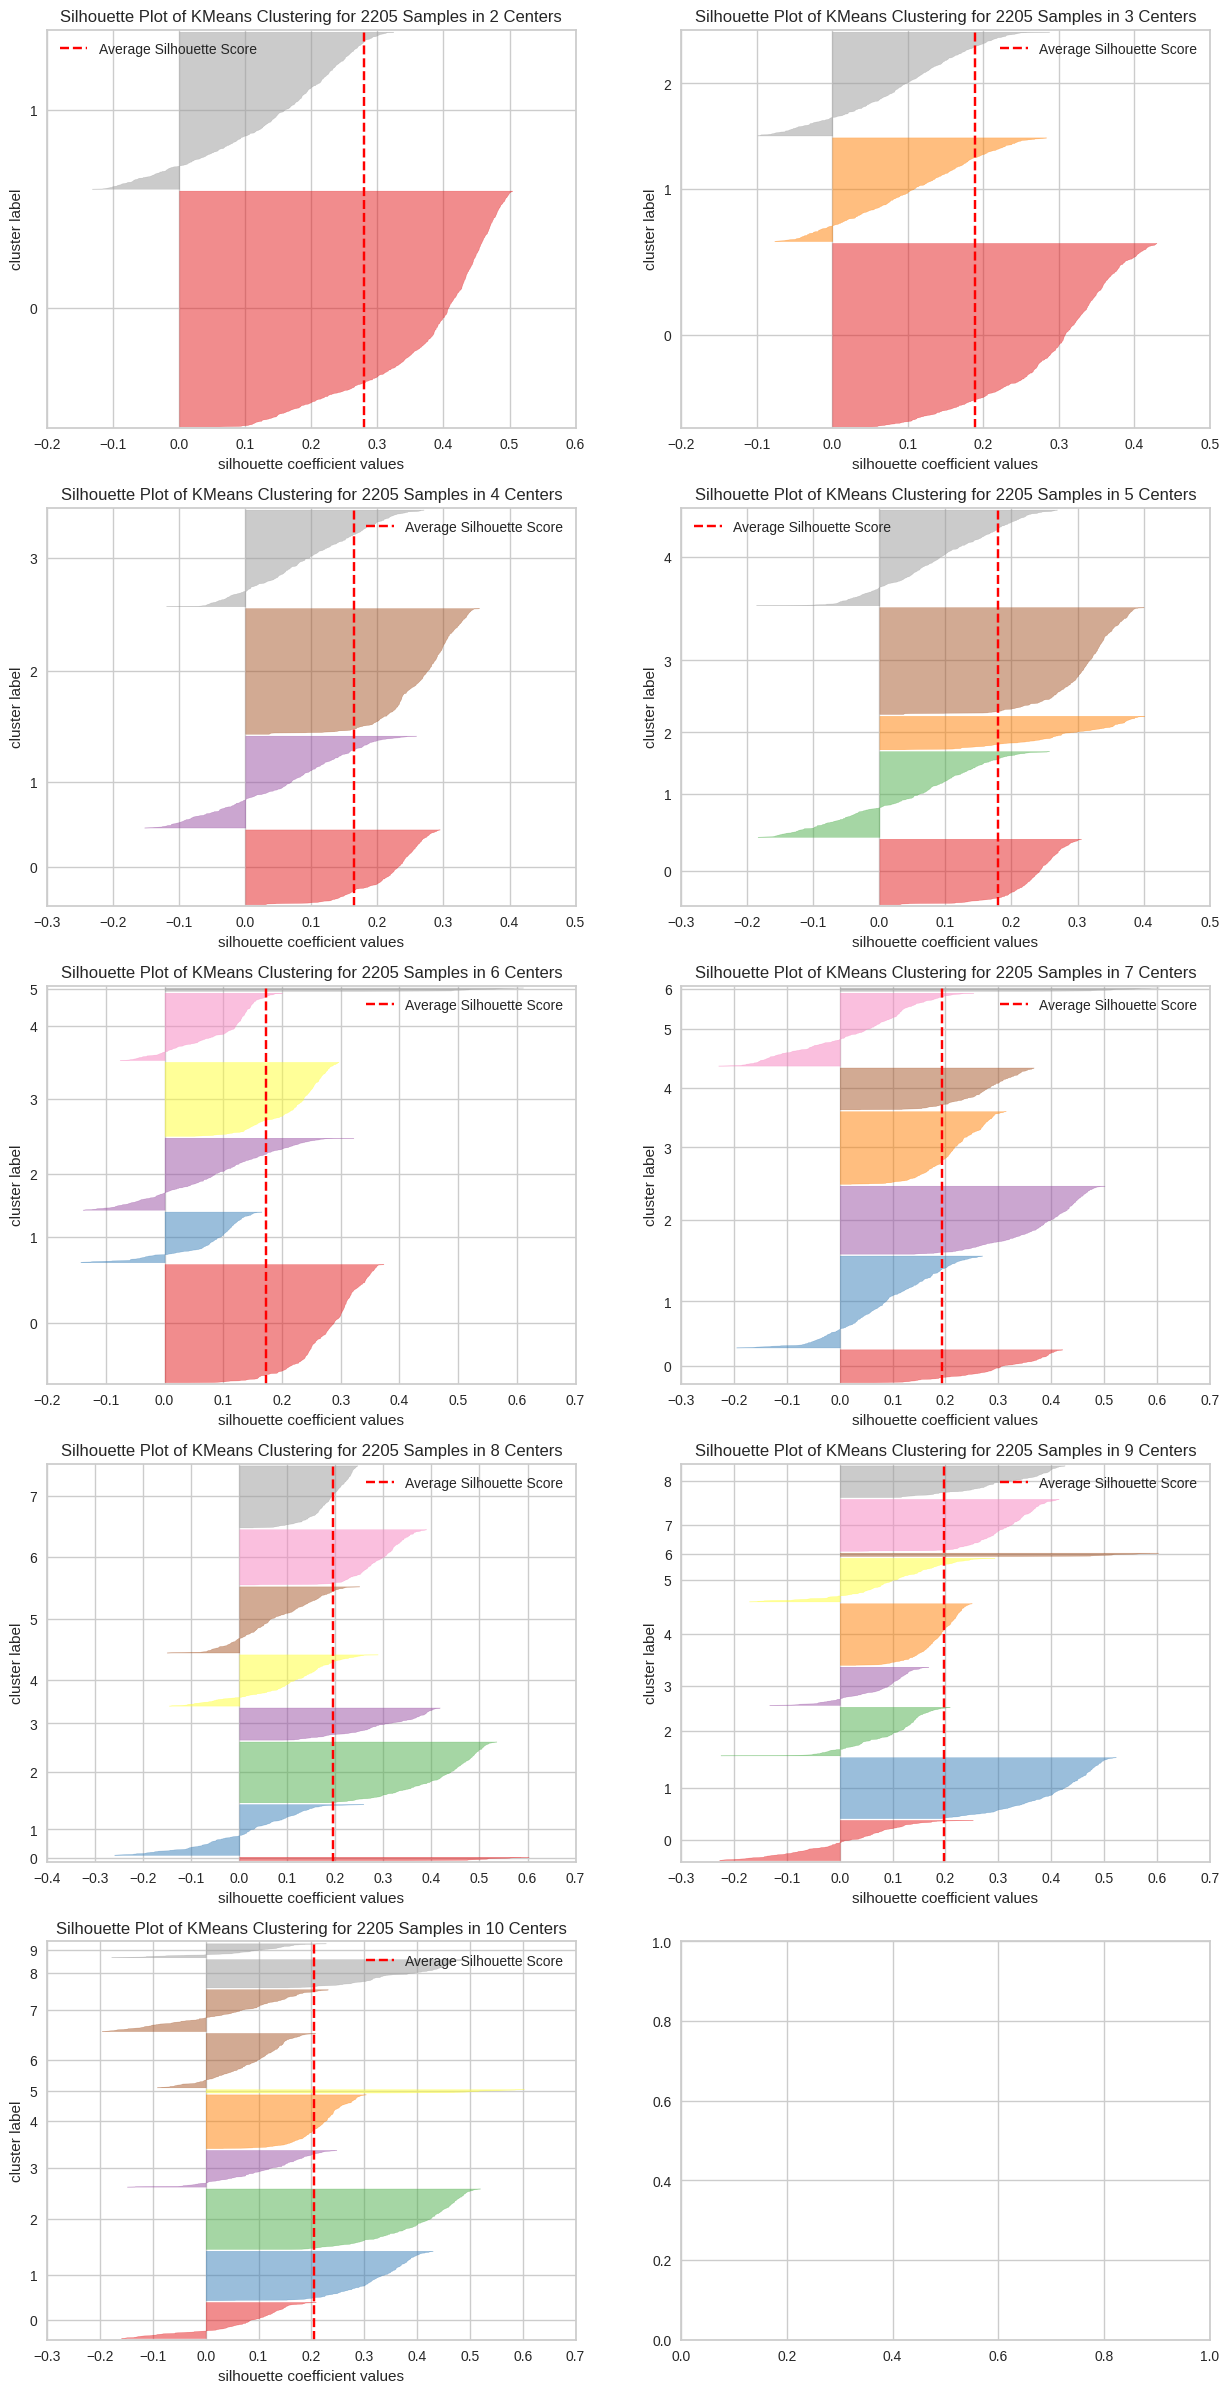

In [104]:
# Silhouette score plot

# membuat range nilai n_clusters
K = range(2,11)

# menentukan ukuran plot dan pengaturan subplot
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

# looping untuk setiap n_clusters
for n_clusters in K:
  # Define Model
  kmeanModel = cluster.KMeans(n_clusters)

  # Graph Positioning
  q, mod = divmod(n_clusters,2)

  # Calculate Silhouette Score
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(dum_df)

  # Plot
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

Insight :    

Berdasarkah hasil silhouette score, nilai rata-rata silhouette score tertinggi adalah pada
* K = 2 (nilainya adalah 0.38585446472674934), dan
* K = 3 (nilainya adalah 0.0.29838129027457533)


---


In this Kmeans clustering model, I chose k=3 clusters instead of k=2 because when using 2 clusters, the clustering results are still too general and do not provide a clear separation between customer groups. The number of clusters of 3 provides finer detail in distinguishing characteristics between customer groups, allowing for more consistent and clearly separated identification of shopping preferences, spending, age groups, and others.

### Define Model

In [105]:
# Define Model
cluster_model = cluster.KMeans(n_clusters=3, random_state=42)

# Predict clusters using fit_predict
cluster_labels = cluster_model.fit_predict(dum_df)

# Add clustering results to the dataset
df_feature['cluster'] = cluster_labels

# Display the dataset with clustering results
print(df_feature)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         id      education    income dt_customer  wine  fruit  meat  fish  \
0     05524       Graduate 58138.000  2012-04-09   635     88   546   172   
1     02174       Graduate 46344.000  2014-08-03    11      1     6     2   
2     04141       Graduate 71613.000  2013-08-21   426     49   127   111   
3     06182       Graduate 26646.000  2014-10-02    11      4    20    10   
4     05324  Post Graduate 58293.000  2014-01-19   173     43   118    46   
...     ...            ...       ...         ...   ...    ...   ...   ...   
2235  10870       Graduate 61223.000  2013-06-13   709     43   182    42   
2236  04001  Post Graduate 64014.000  2014-10-06   406      0    30     0   
2237  07270       Graduate 56981.000  2014-01-25   908     48   217    32   
2238  08235  Post Graduate 69245.000  2014-01-24   428     30   214    80   
2239  09405  Post Graduate 52869.000  2012-10-15    84      3    61     2   

      sweet  gold  ...  acceptedcmp1  acceptedcmp2  complain  response  \
0

In [106]:
# Urutkan df_feature berdasarkan rata-rata kolom spent
sorted_df = df_feature.groupby('cluster')['spent'].mean().sort_values().index

# Buat mapping dari cluster lama ke cluster baru yang sudah diurutkan
cluster_mapping = {old_cluster: new_cluster for new_cluster, old_cluster in enumerate(sorted_df)}

# Buat kolom baru 'sorted_cluster' dengan nilai cluster yang sudah diurutkan
df_feature['sorted_cluster'] = df_feature['cluster'].map(cluster_mapping)

# Mengganti nilai cluster pada kolom 'cluster' dengan nilai cluster yang baru sesuai urutan
df_feature['cluster'] = df_feature['sorted_cluster']

df_feature = df_feature.drop(columns=['sorted_cluster'])
# Tampilkan DataFrame dengan cluster yang sudah diurutkan
df_feature.head()

,id,education,income,dt_customer,wine,fruit,meat,fish,sweet,gold,...,acceptedcmp1,acceptedcmp2,complain,response,living_status,age,spent,children,family_size,cluster
0,05524,Graduate,58138.000,2012-04-09,635,88,546,172,88,88,...,0,0,0,1,Alone,66,1617,0,1,2
1,02174,Graduate,46344.000,2014-08-03,11,1,6,2,1,6,...,0,0,0,0,Alone,69,27,2,3,0
2,04141,Graduate,71613.000,2013-08-21,426,49,127,111,21,42,...,0,0,0,0,Partner,58,776,0,2,1
3,06182,Graduate,26646.000,2014-10-02,11,4,20,10,3,5,...,0,0,0,0,Partner,39,53,1,3,0
4,05324,Post Graduate,58293.000,2014-01-19,173,43,118,46,27,15,...,0,0,0,0,Partner,42,422,1,3,1


In [107]:
df_feature.columns

Index(['id', 'education', 'income', 'dt_customer', 'wine', 'fruit', 'meat',
       'fish', 'sweet', 'gold', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response', 'living_status', 'age', 'spent',
       'children', 'family_size', 'cluster'],
      dtype='object')

## Visualize Cluster

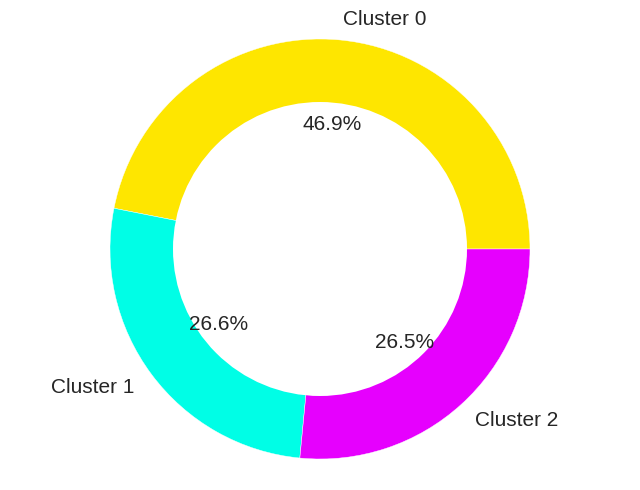

In [108]:
# Mapping for cluster labels
cluster_mapping = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2'
}

# Count the occurrences of each cluster
cluster_counts = df_feature["cluster"].map(cluster_mapping).value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the donut chart
wedges, texts, autotexts = ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%',
                                  colors=['#fee600', '#00fee6', '#e600fe'], wedgeprops={'edgecolor': 'white'},
                                  textprops={'fontsize': 15})

# Draw a white circle in the center to create a donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')
#plt.title("Distribution of Clusters")

# Set fontsize for cluster labels
for text in texts:
    text.set_fontsize(15)

# Show the plot
plt.show()

<ipython-input-109-f76c811e9319>:3: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



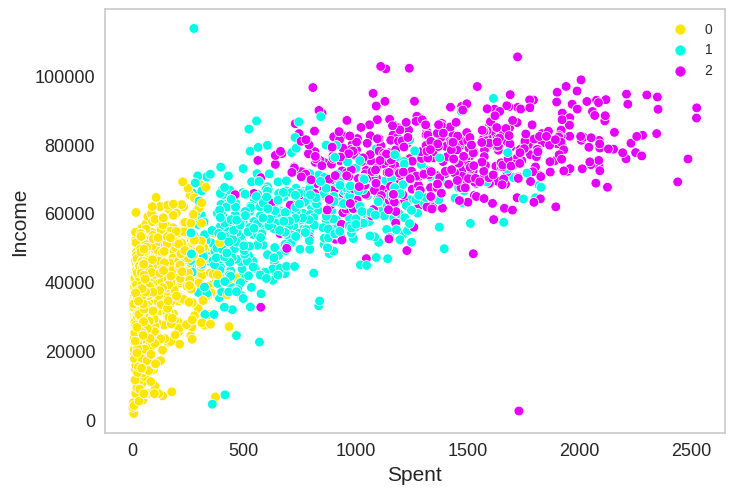

In [109]:
# cluster based on income and spending

sns.scatterplot(data=df_feature, x='spent',y='income',hue='cluster',palette=['#fee600', '#00fee6', '#e600fe','gray','red'])
#plt.title('Cluster Profile Based on Income & Spending')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Spent',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.grid(False)
plt.show()

### Profiling

#### Total Users by Cluster

In [110]:
df_total_user=df_feature.groupby(['cluster'], as_index=False)['id'].nunique()
df_total_user

,cluster,id
0,0,1034
1,1,586
2,2,585


#### User Age by Cluster

In [111]:
df_user_age=df_feature.groupby(['cluster'], as_index = False)['age'].mean()
df_user_age

,cluster,age
0,0,51.571
1,1,58.084
2,2,54.564


#### User Education by Cluster

In [112]:
df_education_cluster=df_feature.groupby(['cluster','education'], as_index = False)['id'].count()
df_education_cluster

,cluster,education,id
0,0,Graduate,523
1,0,Post Graduate,344
2,0,Under Graduate,167
3,1,Graduate,236
4,1,Post Graduate,321
5,1,Under Graduate,29
6,2,Graduate,354
7,2,Post Graduate,175
8,2,Under Graduate,56


#### User Income and Spent by Cluster

In [113]:
df_income=df_feature.groupby(['cluster'], as_index = False)['income','spent'].mean()
df_income

<ipython-input-113-908d9fb62f86>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,cluster,income,spent
0,0,34548.339,99.388
1,1,57835.570,722.099
2,2,75576.226,1388.248


#### User Living Status by Cluster

In [114]:
df_feature.groupby(['cluster','living_status'], as_index = False)['id'].count()

,cluster,living_status,id
0,0,Alone,361
1,0,Partner,673
2,1,Alone,204
3,1,Partner,382
4,2,Alone,218
5,2,Partner,367


#### User total children by Cluster

In [115]:
cluster_avg_children=df_feature.groupby(['cluster'], as_index = False)['children'].agg(['min','max','mean'])
cluster_avg_children

,min,max,mean
cluster,,,
0,0,3,1.225
1,0,3,1.119
2,0,3,0.289


#### User Product References by Cluster

In [116]:
df_product_ref=df_feature.groupby(['cluster'], as_index = False)['wine','fruit','meat', 'fish', 'sweet', 'gold'].agg(['min','max','mean'])
df_product_ref

<ipython-input-116-52b061d9f9cb>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



wine               fruit             meat               fish       \
         min   max    mean   min  max   mean  min   max    mean  min  max   
cluster                                                                     
0          0   309  42.495     0   65  5.228    0   137  22.889    0  179   
1          6  1462 463.787     0  138 20.224    3   514 131.664    0  223   
2          1  1493 614.315     0  199 70.021   74  1725 450.754    0  259   

                sweet             gold              
           mean   min  max   mean  min  max   mean  
cluster                                             
0         7.789     0   78  5.369    0  262 15.617  
1        27.631     0  262 20.558    0  321 58.235  
2       100.867     0  198 72.169    0  249 80.123

#### User Purchasing Platform Preferences by Cluster

In [117]:
df_purchase_ref=df_feature.groupby(['cluster'], as_index = False)['numwebpurchases','numcatalogpurchases','numstorepurchases'].sum()
df_purchase_ref

<ipython-input-117-28085ebea014>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,cluster,numwebpurchases,numcatalogpurchases,numstorepurchases
0,0,2190,586,3363
1,1,3742,1769,4523
2,2,3110,3478,4955


#### User complain by Cluster

In [118]:
cluster_complain = df_feature.groupby(['cluster', 'complain'])['id'].count().reset_index()
cluster_complain.rename(columns={'id': 'Number of Users'}, inplace=True)
cluster_complain['complain'] = cluster_complain['complain'].map({0: 'No Complain', 1: 'Complain'})
print(cluster_complain)

   cluster     complain  Number of Users
0        0  No Complain             1023
1        0     Complain               11
2        1  No Complain              581
3        1     Complain                5
4        2  No Complain              581
5        2     Complain                4


#### User Purchase with Deals/Promo

In [119]:
cluster_discount = df_feature.groupby(['cluster', 'numdealspurchases'])['id'].count().reset_index()
cluster_discount.rename(columns={'id': 'Number of Users', 'numdealspurchases': 'Total Purchases with Discount'}, inplace=True)
print(cluster_discount)


    cluster  Total Purchases with Discount  Number of Users
0         0                              0                5
1         0                              1              453
2         0                              2              297
3         0                              3              154
4         0                              4               86
5         0                              5               23
6         0                              6                8
7         0                              7                5
8         0                             15                3
9         1                              0                5
10        1                              1               80
11        1                              2              127
12        1                              3              110
13        1                              4               82
14        1                              5               66
15        1                             

In [120]:
# Calculate total discount purchases and total discount users per cluster
cluster_disc_info = df_feature[df_feature['numdealspurchases'] >= 1].groupby('cluster')['id'].nunique().reset_index()
cluster_disc_info.rename(columns={'id': 'Total Discount Users'}, inplace=True)

cluster_disc_purchase = df_feature[df_feature['numdealspurchases'] >= 1].groupby('cluster')['numdealspurchases'].sum().reset_index()
cluster_disc_purchase.rename(columns={'numdealspurchases': 'Total Discount Purchased'}, inplace=True)

# Merge the two dataframes
cluster_disc = pd.merge(cluster_disc_info, cluster_disc_purchase, on='cluster')

# Display the results
print(cluster_disc)

   cluster  Total Discount Users  Total Discount Purchased
0        0                  1029                      2096
1        1                   581                      2187
2        2                   556                       829


### Profil Visualize

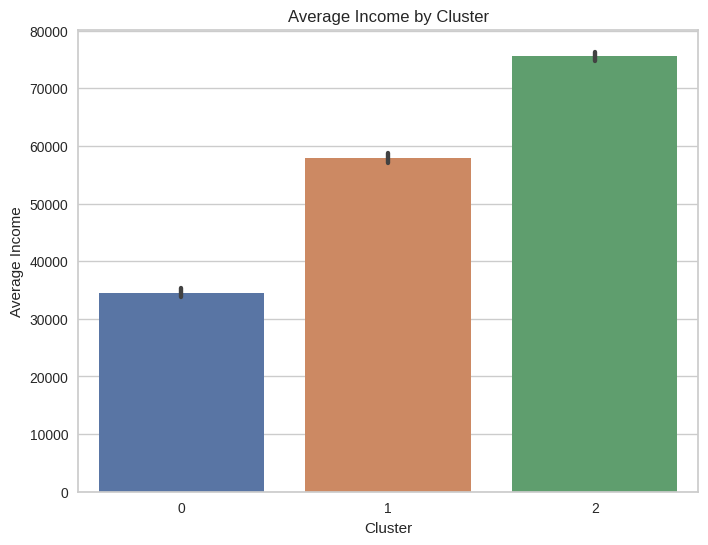

In [121]:
# Displays the average income of each cluster

plt.figure(figsize=(8, 6))
sns.barplot(x="cluster", y="income", data=df_feature, estimator=np.mean,palette='deep')
plt.title("Average Income by Cluster")
plt.ylabel("Average Income")
plt.xlabel("Cluster")

plt.show()

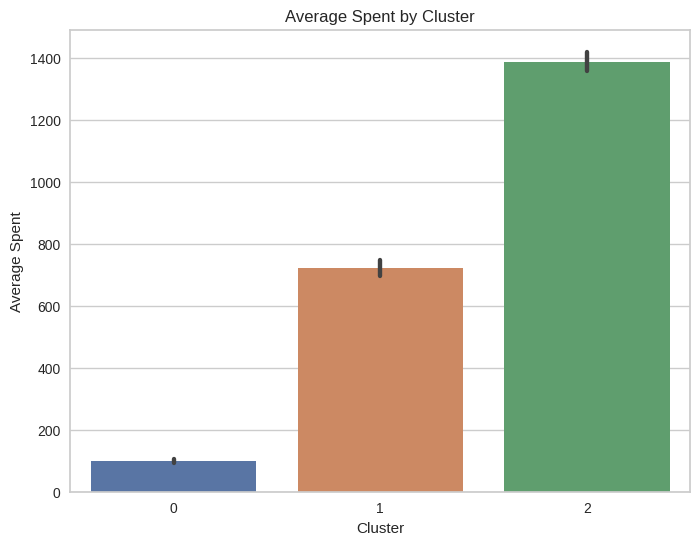

In [122]:
# Displays the average spent of each cluster

plt.figure(figsize=(8, 6))
sns.barplot(x="cluster", y="spent", data=df_feature, estimator=np.mean,palette='deep')
plt.title("Average Spent by Cluster")
plt.ylabel("Average Spent")
plt.xlabel("Cluster")

plt.show()

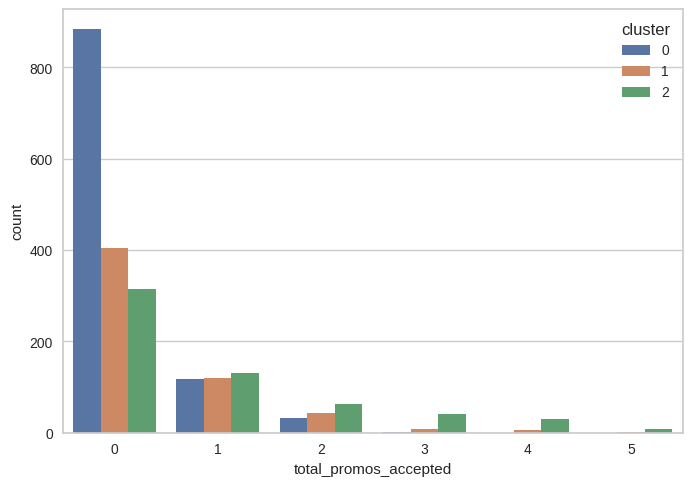

In [123]:
# comparison of the total primo received by each cluster

df_feature["total_promos_accepted"] = df_feature['acceptedcmp3']+ df_feature['acceptedcmp4']+ df_feature['acceptedcmp5']+df_feature['acceptedcmp1']+ df_feature['acceptedcmp2']+df_feature['response']
sns.countplot(data=df_feature, x='total_promos_accepted',hue='cluster',palette='deep')
plt.show()

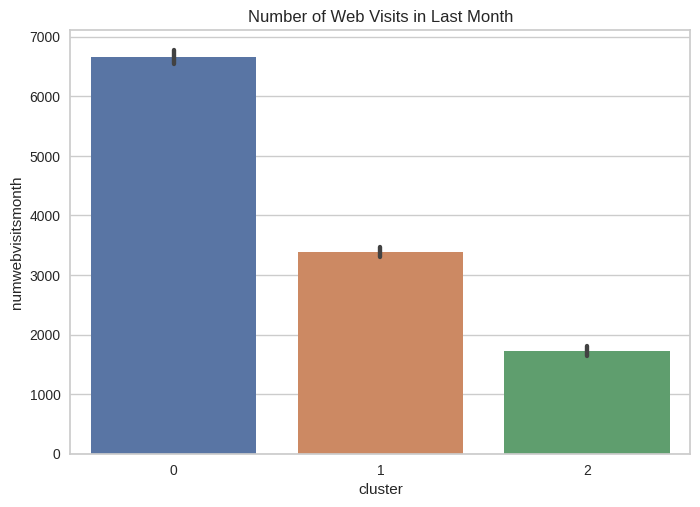

In [124]:
#Plotting the number of web visits month

plt.figure()
pl=sns.barplot(y=df_feature["numwebvisitsmonth"],x=df_feature["cluster"],palette='deep',estimator=sum)
pl.set_title("Number of Web Visits in Last Month")
plt.show()

<ipython-input-125-2c78b9dbb425>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-125-2c78b9dbb425>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-125-2c78b9dbb425>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-125-2c78b9dbb425>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




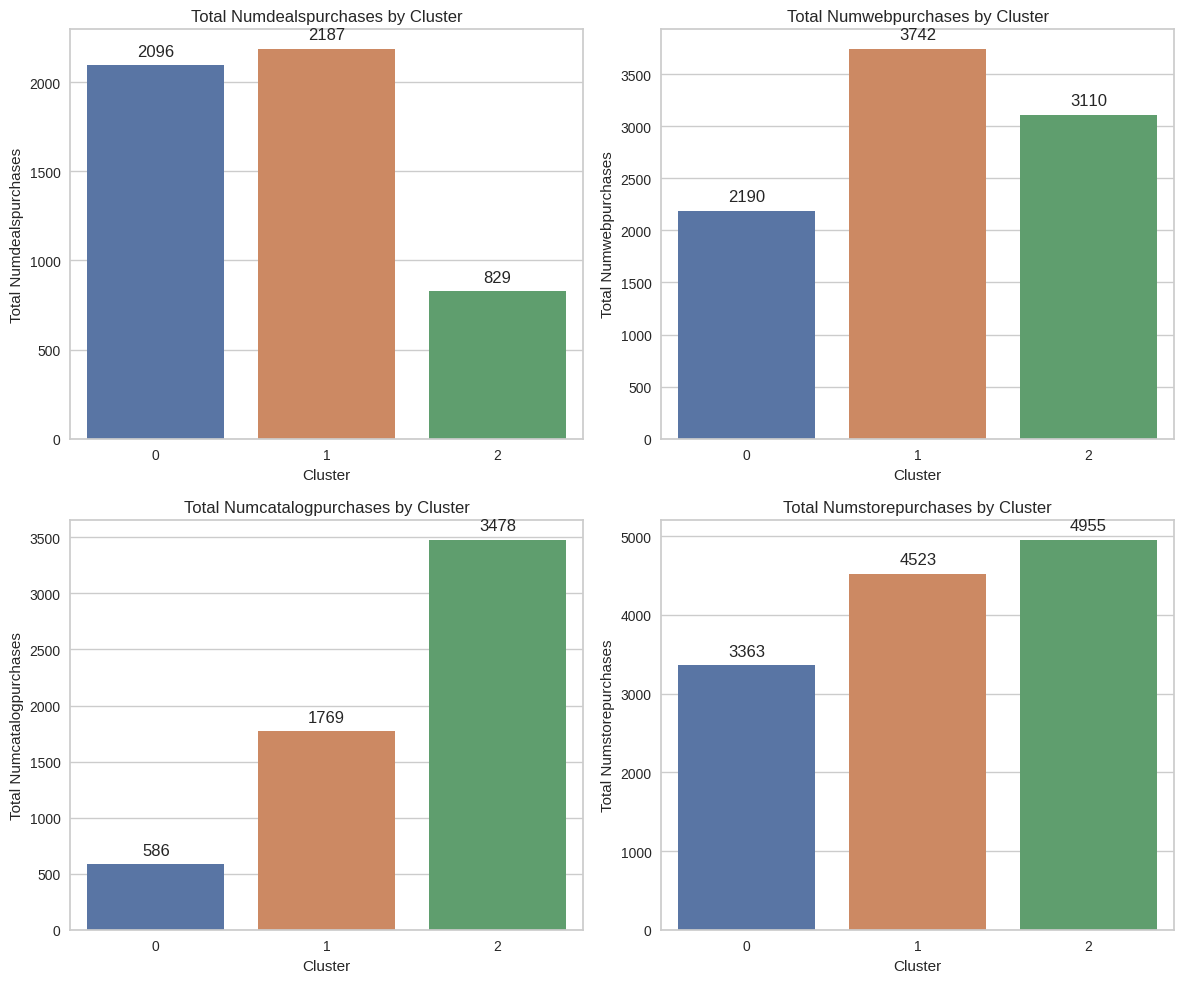

In [125]:
# Daftar jenis variabel yang akan ditampilkan
features = ['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']

# Mengatur ukuran subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop untuk membuat visualisasi
for i, var in enumerate(features):
    row = i // 2
    col = i % 2

    ax = sns.barplot(x="cluster", y=var, data=df_feature, ax=axs[row, col], ci=None, estimator=sum,palette='deep')
    axs[row, col].set_title(f'Total {var.capitalize()} by Cluster')
    axs[row, col].set_xlabel('Cluster')
    axs[row, col].set_ylabel(f'Total {var.capitalize()}')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

plt.tight_layout()

# Menampilkan subplot
plt.show()